# Library importation

https://www.musicindustryhowto.com/elements-of-music/

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [66]:
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ShuffleSplit, KFold
from sklearn.feature_selection import RFE
from matplotlib import colors

# Data Exploration

In [4]:
df = pd.read_csv("spotify_data.csv")

In [4]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [4]:
df.shape

(169909, 19)

In [5]:
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


In [6]:
df.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

# Data Preprocessing

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

There is no missing values on the dataframe

### Change of the data types

In [5]:
df["artists"] = df["artists"].str.replace("[", "", regex=True).str.replace("]", "", regex=True).astype("string")

In [6]:
df["explicit"].unique()

array([0, 1])

In [6]:
# explicit is a boolean value. So instead of having an int, it's better to have a boolean
df["explicit"] = df["explicit"].astype("bool")

In [7]:
# id is actually a string, so we can replace its type from object to string
df["id"] = df["id"].astype("string")

In [25]:
print(df["key"].max())
df["key"].min()

11


0

In [8]:
# maximum value of key is 11 and the minimum value is 0 so int8 is enough to represent the key
df["key"] = df["key"].astype("int8")

In [31]:
df["mode"].unique()

array([1, 0])

In [9]:
# mode represents the modality of a track. 0 for minor and 1 for major.
# we'll use int8 to represent it
df["mode"] = df["mode"].astype("int8")

In [10]:
# change the data type of name from object to string
df["name"] = df["name"].astype("string")

In [35]:
print(df["popularity"].max())
df["popularity"].min()

100


0

In [11]:
# the popularity is between 0 and 100 so 8 bits are enough
df["popularity"] = df["popularity"].astype("int8")

In [12]:
print(df["tempo"].min())
df["tempo"].max()

0.0


244.091

It's better not to change the type of tempo because it doesn't have a fix interval and depend from the duration

In [12]:
# remove the release_date column because of the inconsistency of its data
# sometimes we have the whole date and other times, it's just the year
# it seems like just keeping the year column is relevant
new_df = df.drop(columns=["release_date"])

In [13]:
# now let's see the memory usage after that preprocessing
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  string 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  bool   
 6   id                169909 non-null  string 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int8   
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int8   
 12  name              169909 non-null  string 
 13  popularity        169909 non-null  int8   
 14  speechiness       169909 non-null  float64
 15  tempo             169909 non-null  float64
 16  valence           16

We reduced the size from 25MB to 18.8MB

In [200]:
new_df.shape

(169909, 18)

In [13]:
new_df.drop_duplicates(inplace=True)

In [15]:
new_df.shape

(169909, 18)

No duplicate value

# Data Visualization

## PCA

In [16]:
from sklearn.decomposition import PCA

In [206]:
new_df.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'speechiness', 'tempo', 'valence',
       'year'],
      dtype='object')

In [18]:
songs_id = new_df["id"]

In [18]:
# remove non-numerical data and categorical data
pca_df = new_df.drop(columns=["name", "artists", "id", "explicit", "mode"])

In [19]:
pca_df = new_df.drop(columns=["name", "artists", "id"])

# apply the log on duration_ms
pca_df["duration_ms"] = pca_df["duration_ms"].apply(np.log)

# centered data 
pca_df = pca_df - pca_df.mean()

# perform PCA
pca = PCA()
pca_model = pca.fit_transform(pca_df)

In [26]:
column = [f"PC {i+1}" for i in range(pca.n_components_)]

In [27]:
songs_ids = new_df["id"].tolist()
# let's see the data in the pca space
pca_space_df = pd.DataFrame(pca_model, index=songs_ids, columns=column)
pca_space_df.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15
6KbQ3uYMLKb5jDxLF7wYDD,47.298664,-33.496750,-6.831117,-4.122078,4.771617,-0.353952,0.067012,-0.206238,0.147109,0.133307,-0.336644,-0.091504,-0.111758,-0.125123,-0.015456
6KuQTIu1KoTTkLXKrwlLPV,67.797473,-5.199099,-7.265930,10.962658,3.198372,-0.148380,-0.567682,0.067961,0.287768,0.303161,0.069147,-0.138951,0.023925,-0.000675,-0.156786
6L63VW0PibdM1HDSBoqnoM,54.201155,-24.290924,-7.045932,3.144215,-0.007315,0.566546,0.911230,0.650160,0.010269,-0.260741,-0.027219,-0.040328,-0.399838,0.476548,0.195272
6M94FkXd15sOAOQYRnWPN8,53.310769,-24.853850,-6.906720,-1.853086,-4.150871,0.785353,0.215439,-0.296587,0.337218,0.168755,-0.418507,-0.126417,-0.208801,-0.119765,-0.031314
6N6tiFZ9vLTSOIxkj8qKrd,78.380597,13.590698,-7.688573,-1.240064,5.860678,0.027254,-1.473737,-0.181493,0.150557,0.474371,-0.032419,-0.115688,0.049887,0.068309,0.024803


In [28]:
# let's take a look to the coordinates of components in the original space
df_origin_to_pca = pd.DataFrame(pca.components_.T, index=pca.feature_names_in_, columns=column)
df_origin_to_pca

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15
acousticness,0.006729,-0.002751,-0.001865,0.020992,-0.000347,-0.051515,0.020202,-0.642147,-0.464695,-0.011783,-0.446498,0.210932,0.150879,0.258303,-0.186199
danceability,-0.000892,0.000842,-0.000921,-0.008140,0.000584,-0.001619,0.111658,0.210368,0.006321,-0.122003,-0.411878,-0.117902,-0.573246,-0.202040,-0.612622
duration_ms,-0.001831,0.001642,0.000377,-0.001086,-0.000581,0.248414,-0.924557,0.173826,-0.097002,-0.050664,-0.200164,0.021441,0.007494,0.021059,0.016119
energy,-0.004380,0.001053,0.001895,-0.031362,0.000083,0.023767,-0.004531,0.212406,0.332423,-0.026176,0.123339,0.202697,0.414392,0.508475,-0.596268
explicit,-0.001613,0.001327,0.001858,-0.002220,0.000326,0.052476,0.142155,0.413622,-0.300535,0.728057,-0.277961,-0.018560,0.298060,-0.136169,-0.023801
instrumentalness,0.002723,-0.001015,0.000988,0.019097,0.000090,0.061822,-0.108478,-0.407713,0.695067,0.500715,-0.242664,0.007780,-0.147089,-0.022186,0.053857
key,-0.001195,0.000592,0.001889,-0.027790,0.999498,-0.014093,-0.004687,-0.000776,-0.000482,0.001793,0.000451,-0.000227,-0.000200,-0.000457,-0.000046
liveness,0.000245,-0.000288,0.000979,-0.003503,-0.000161,0.002299,-0.005588,0.061759,-0.009942,0.052311,0.136025,0.928545,-0.169415,-0.289585,-0.006418
loudness,-0.084998,0.024469,0.028385,-0.994145,-0.027903,-0.000037,-0.004714,-0.036148,-0.011760,0.017130,-0.002531,-0.006612,-0.014012,-0.006599,0.014755
mode,0.000264,-0.000528,0.000057,0.000090,-0.014783,-0.962411,-0.245835,0.072935,0.022179,0.079671,-0.026972,-0.003521,-0.009167,0.007880,-0.008081


In [29]:
# part of the variance explained by each component
pca.explained_variance_ratio_

array([5.49536741e-01, 4.02418368e-01, 3.07289069e-02, 1.11056006e-02,
       5.85166750e-03, 9.82006493e-05, 8.20190567e-05, 4.74495263e-05,
       3.53963765e-05, 3.45890459e-05, 2.67406353e-05, 1.51156268e-05,
       8.23726862e-06, 6.35413506e-06, 4.61314108e-06])

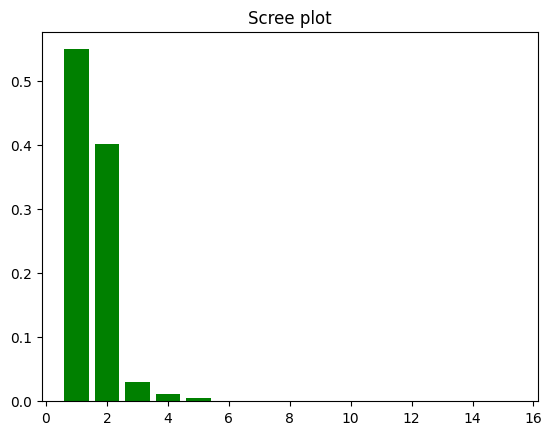

In [24]:
# explained variance ratio

# get the number of singular values which is equal to the number of components
nb_sing_values = len(pca.singular_values_)

# plot a bar chart of the explained variance
plt.title("Scree plot")
plt.bar(x = range(1, nb_sing_values+1), height=pca.explained_variance_ratio_, color="g")
plt.show()

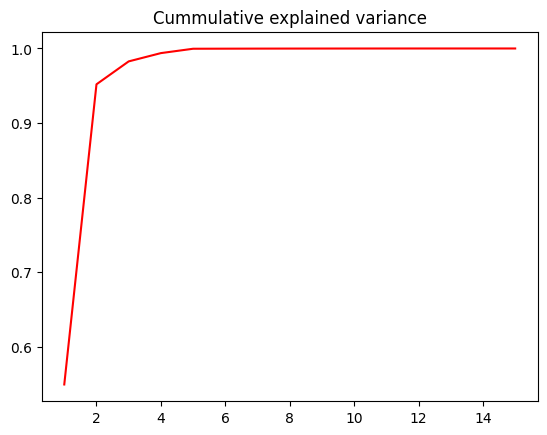

In [25]:
# let us take a look to the cumulative explained variance
plt.title("Cummulative explained variance")
plt.plot(range(1, nb_sing_values+1), np.cumsum(pca.explained_variance_ratio_), c="r")
plt.show()

From this plot, we can see that 2 components are enough to get good insights of our data

### 2D representation

#### Representation with the first 2 components

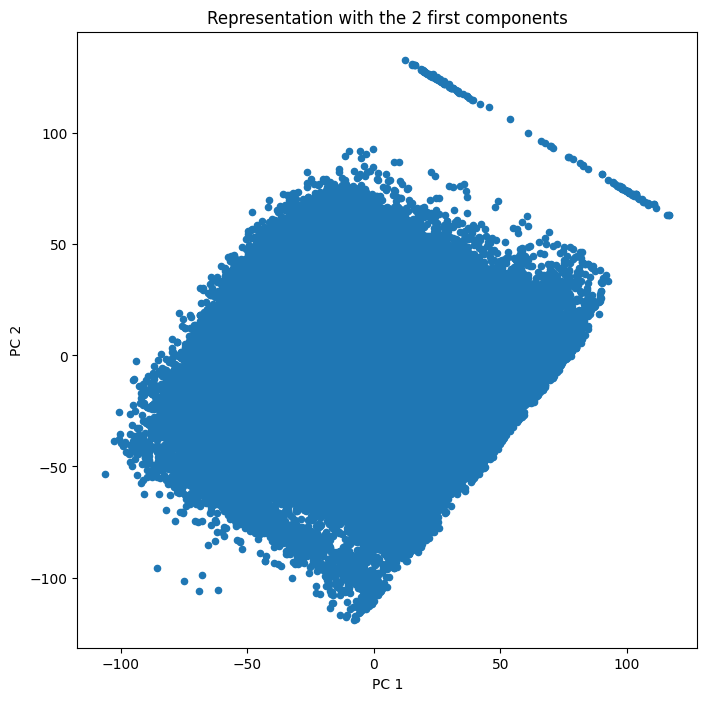

In [66]:
ax = pca_space_df.plot(kind='scatter',x='PC 1', y='PC 2',figsize=(8,8))
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_title("Representation with the 2 first components")
plt.show()

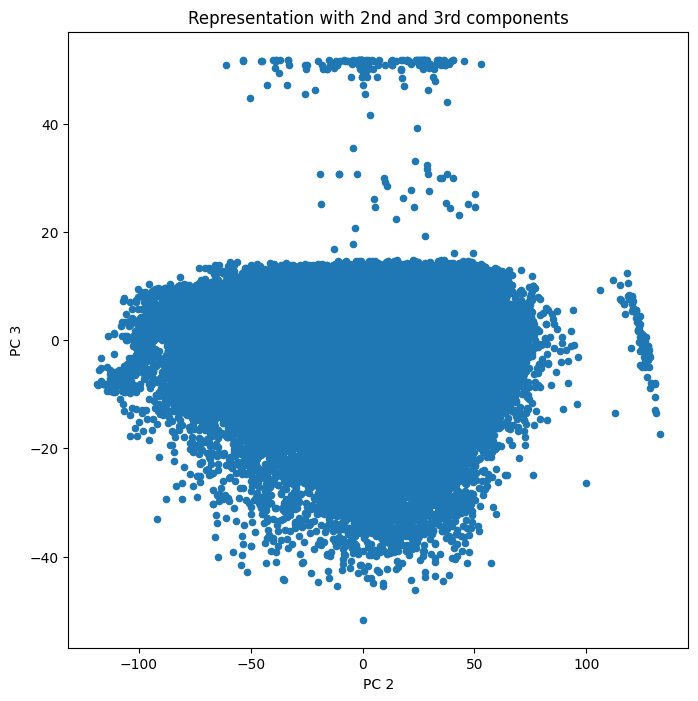

In [67]:
ax = pca_space_df.plot(kind='scatter',x='PC 2', y='PC 3',figsize=(8,8))
ax.set_xlabel("PC 2")
ax.set_ylabel("PC 3")
ax.set_title("Representation with 2nd and 3rd components")
plt.show()

## What do these clusters represent ?

#### Data from the representation with 2nd and 3rd components

In [69]:
# cluster from PC 2 >= 100
temp = pca_space_df[(pca_space_df["PC 2"] >= 100)].index.tolist()

In [73]:
new_df[new_df["id"].isin(temp)]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
6930,0.931000,'Crain & Taylor',0.0,598425,0.000075,False,3oKBZhpwrMiOhosXauv3lP,0.892000,1,0.115,-19.703,0,Ocean Waves,47,0.0,0.0,0.0,2008
7411,0.111000,'Sound Dreamer',0.0,5403500,0.000099,False,7foc25ig7dibxvULPU2kBG,0.392000,2,0.137,-21.669,1,Brown Noise - 90 Minutes,50,0.0,0.0,0.0,2013
7792,0.145000,'Fan Sounds',0.0,500167,0.000020,False,4xu38KnbRHbRHRwdg4KFul,0.213000,6,0.114,-25.556,1,Box Fan Long Loop For Sleep,60,0.0,0.0,0.0,2017
15605,0.962000,'Hippie Sabotage',0.0,157041,0.236000,True,4aVbFYIU67P8F5pqPakaXQ,0.000335,7,0.105,-13.909,0,Waiting Too Long,54,0.0,0.0,0.0,2014
15787,0.956000,'White Noise Spa',0.0,300300,0.000020,False,5wf3wwLBJj4j46xtJETZ8L,0.238000,10,0.131,-20.961,0,Soothing Deep Pink Noise,58,0.0,0.0,0.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161305,0.960000,'Fizzonaut',0.0,132923,0.000261,False,6UrBiRJabWOu90XTluKZER,0.203000,1,0.111,-23.444,1,Tepid Rainscape,68,0.0,0.0,0.0,2019
161443,0.916000,'Water Sound Natural White Noise',0.0,63000,0.032000,False,5pGBDKBaR63vuJ4g8ialcU,0.202000,1,0.103,-30.704,1,Deep Sleep Recovery Noise,70,0.0,0.0,0.0,2020
169522,0.913000,'Granular',0.0,205161,0.000164,False,2e6fCxto7NzsnujvliBtEk,0.910000,10,0.155,-31.221,0,White Noise - 700 hz,64,0.0,0.0,0.0,2017
169743,0.000013,'Naturaleza FX',0.0,150879,0.000020,False,4UFlnhDTGyKvlhOQziDHkG,0.208000,1,0.311,-16.873,1,Colors of the Rain,68,0.0,0.0,0.0,2019


In [74]:
new_df[new_df["id"].isin(temp)]["year"].unique()

array([2008, 2013, 2017, 2014, 2016, 2019, 2007, 2010, 2015, 2018, 2009,
       1998, 1991, 2012, 2020])

The 2nd component represents songs with a tempo equal to 0.

And it turns out that when the tempo is equal to 0, the speechiness, the danceability and the valence are also null.

In [64]:
# max popularity of the songs
new_df[new_df["id"].isin(temp)]["popularity"].max()

13

In [76]:
temp = pca_space_df[(pca_space_df["PC 3"] >= 40)].index.tolist()
new_df[new_df["id"].isin(temp)]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
8077,0.0106,'Tame Impala',0.622,218200,0.784,True,3Naa5mKj5pbrNGyHsE04zo,0.008900,1,0.1040,-3.830,0,The Less I Know The Better,0,0.0292,116.892,0.780,2020
8084,0.0352,'Anitta',0.967,205595,0.772,False,5JY9u3KjWIGL188kp59Ktn,0.000013,3,0.0792,-3.291,0,Blá blá blá - Extended Remix,1,0.0851,131.998,0.856,2020
8090,0.4600,'Morat',0.591,230040,0.659,False,0BLnBgQf8xmFN2qsxF16hy,0.000000,11,0.3240,-5.464,1,Enamórate De Alguien Más,2,0.0332,145.997,0.622,2020
8092,0.0608,'Morat',0.582,240240,0.921,False,3YV7XXT0lAlY4wACbw3HDZ,0.000000,4,0.1370,-3.928,1,Cómo Te Atreves,0,0.0457,131.004,0.686,2020
8093,0.1260,"'Morat', 'Juanes'",0.683,231440,0.970,False,4AUgtXs2HmOXrw0ROxQM8l,0.000000,2,0.1050,-3.589,1,Besos En Guerra,0,0.0489,143.931,0.769,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169848,0.2620,'Ellie Goulding',0.453,148689,0.316,False,2qND8W95D4UIab4MszDGyS,0.000894,0,0.1350,-8.525,1,How Long Will I Love You,3,0.0316,125.628,0.177,2020
169849,0.2620,'Ellie Goulding',0.453,148689,0.316,False,3AMQUcKmht3G7PhvTJYuZ4,0.000894,0,0.1350,-8.525,1,How Long Will I Love You,0,0.0316,125.628,0.177,2020
169850,0.9320,'Ellie Goulding',0.491,188733,0.367,False,54OjRoNNwpExHizhCKhddk,0.000876,10,0.1110,-7.164,1,Your Song,0,0.0308,134.105,0.455,2020
169851,0.9730,'Ellie Goulding',0.415,207373,0.262,False,6lMqDaZjoqe6J1p8TdHuBZ,0.000003,9,0.1060,-12.530,1,I Know You Care,4,0.0333,105.861,0.311,2020


In [78]:
new_df[new_df["id"].isin(temp)]["year"].unique()

array([2020])

In [79]:
new_df[new_df["id"].isin(temp)]["popularity"].unique()

array([ 0,  1,  2,  4, 13,  8,  9,  5, 10,  6,  7,  3], dtype=int8)

The third principal component represents the least popular song of 2020

### Data from the representation with the 2 first components

In [91]:
# get the data corresponding to the second cluster in pca space
temp = pca_space_df[((pca_space_df["PC 2"] >= 60) & (pca_space_df["PC 1"] >= 100)) | ((pca_space_df["PC 2"] >= 80) & (pca_space_df["PC 1"] >= 10))].index.tolist()
new_df[(new_df["id"].isin(temp))]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
2721,0.099500,'Frank Sinatra',0.0,60280,0.906000,False,0P7TUyrm6OfIDJJKcidvnu,0.000018,1,0.366,-6.227,1,My Kind Of Town (Reprise) - Live At The Sands ...,22,0.0,0.0,0.0,1966
3387,0.756000,'Waylon Jennings',0.0,14708,0.048400,False,2mex2o4uA69pMcLjMtyyGb,0.000144,4,0.166,-18.198,1,Ride Me Down Easy,29,0.0,0.0,0.0,1973
6930,0.931000,'Crain & Taylor',0.0,598425,0.000075,False,3oKBZhpwrMiOhosXauv3lP,0.892000,1,0.115,-19.703,0,Ocean Waves,47,0.0,0.0,0.0,2008
7411,0.111000,'Sound Dreamer',0.0,5403500,0.000099,False,7foc25ig7dibxvULPU2kBG,0.392000,2,0.137,-21.669,1,Brown Noise - 90 Minutes,50,0.0,0.0,0.0,2013
7792,0.145000,'Fan Sounds',0.0,500167,0.000020,False,4xu38KnbRHbRHRwdg4KFul,0.213000,6,0.114,-25.556,1,Box Fan Long Loop For Sleep,60,0.0,0.0,0.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162730,0.951000,"'Igor Stravinsky', 'Columbia Symphony Orchestra'",0.0,63373,0.126000,False,3l4zPozgfoLhF6JnUfWDMf,0.689000,8,0.608,-16.260,1,L'Oiseau de feu: Dialogue de Kachtchei avec Iv...,0,0.0,0.0,0.0,1948
164201,0.862000,'Bill Cosby',0.0,215280,0.770000,False,2W0KFIFBFcLBlklD7ugiw6,0.000002,9,0.694,-15.316,0,Noah: Right!,16,0.0,0.0,0.0,1963
169522,0.913000,'Granular',0.0,205161,0.000164,False,2e6fCxto7NzsnujvliBtEk,0.910000,10,0.155,-31.221,0,White Noise - 700 hz,64,0.0,0.0,0.0,2017
169743,0.000013,'Naturaleza FX',0.0,150879,0.000020,False,4UFlnhDTGyKvlhOQziDHkG,0.208000,1,0.311,-16.873,1,Colors of the Rain,68,0.0,0.0,0.0,2019


In [93]:
new_df[new_df["id"].isin(temp)]["year"].min()

1924

From the dataframe, we see that all those data have a danceability, a tempo, a valence and a speechiness equal to 0.

From the analysis made before on the second component which revealed that the second component was capture songs with a danceability, tempo, valence and speechiness equal to 0 from 1991 and this second analysis of the 2 first components together where we have the information of PC 2 + years from 1924, we can deduce that PC 1 captures information about the year.

### 3D Representation

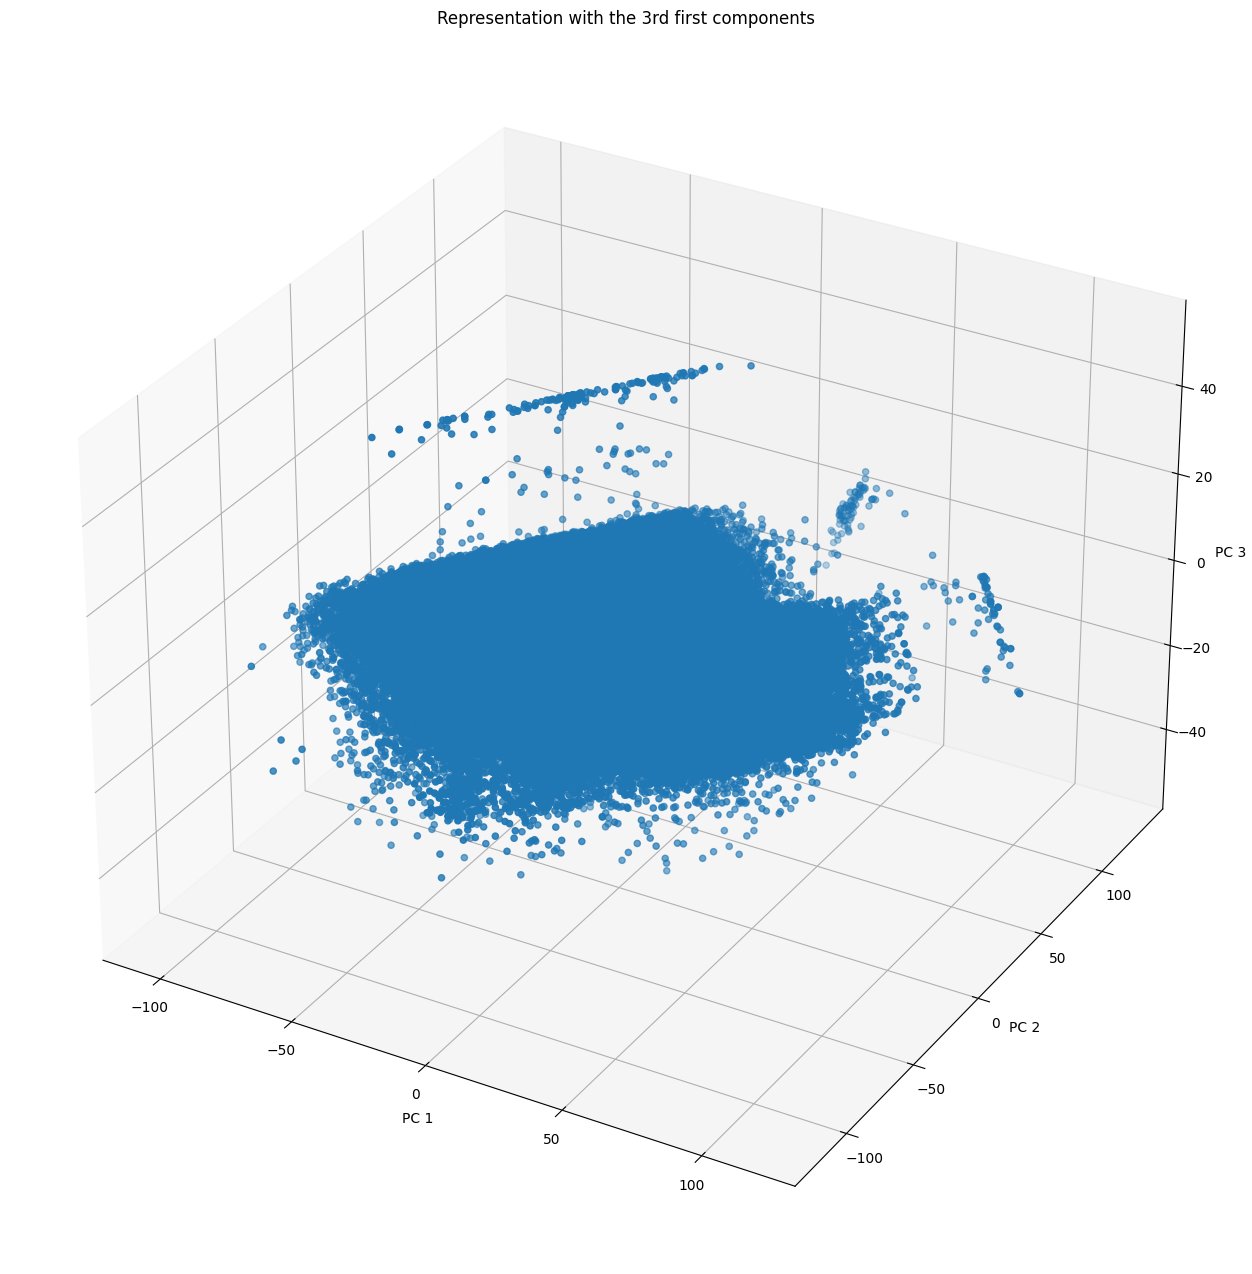

In [94]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection="3d")
ax.set_title("Representation with the 3rd first components")
ax.scatter(pca_model[:, 0], pca_model[:, 1], pca_model[:, 2])
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
plt.show()

### Other hypothesis

From df_origin_to_pca, we see that PCA 1 and PCA 2's coordinates are mostly expressed from tempo and year while PCA 3's coordinates are mostly expressed from year and popularity. 

Let us plot them and see if we got any insight

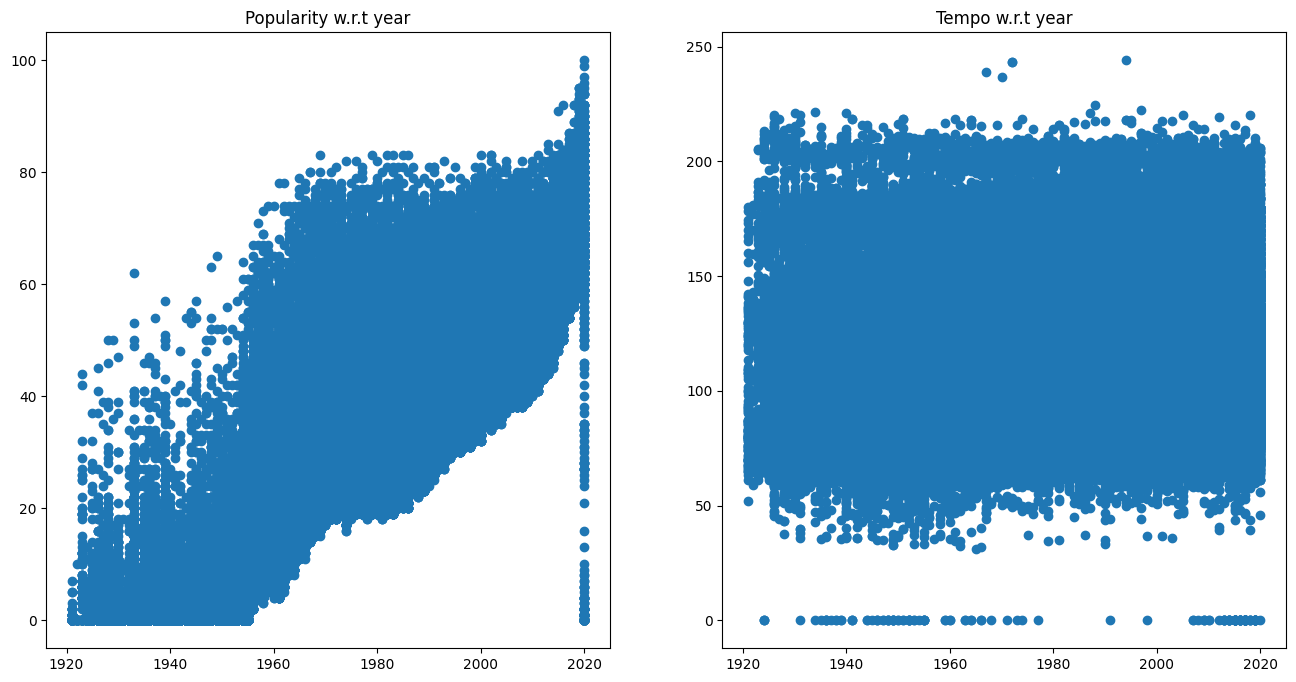

In [111]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121)
ax.scatter(x=new_df["year"], y=new_df["popularity"])
ax.set_title("Popularity w.r.t year")

ax2 = fig.add_subplot(122)
ax2.scatter(x=new_df["year"], y=new_df["tempo"])
ax2.set_title("Tempo w.r.t year")
plt.show()

So,it seems like year is strongly correlated to popularity and also that PCA 1&2 were probably representing songs with null tempo over the years

# Data Splitting

In order to train and test our models, we decided to split our dataset into train and testing data. Testing data will represent 30% of our dataset

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# ***************** splitting ******************
df_train, df_test = train_test_split(new_df)

# reset indexes 
df_train.reset_index(drop=True)
df_test.reset_index(drop=True)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
0,0.51800,'Sufjan Stevens',0.430,405627,0.457,False,6oNs211OtOGzyZ2fvnMPHS,0.086800,4,0.1230,-8.495,0,Come On! Feel the Illinoise! Part I: The World...,49,0.0332,109.875,0.709,2005
1,0.88200,'Jan & Dean',0.553,179040,0.656,False,5obt1hqMSHTfDMFwzYMKQC,0.070100,2,0.5570,-7.167,1,Pocket Full of Rainbows,41,0.0616,61.665,0.606,1996
2,0.15100,'N.W.A.',0.858,263040,0.713,True,2wMC9z6zA191MTY0CcNcWh,0.000027,7,0.3150,-7.374,1,Chin Check,42,0.3700,100.012,0.667,1996
3,0.01110,'AJR',0.424,212760,0.778,False,1ZzehTXQaSjL0okOGJBVPB,0.000002,11,0.2810,-4.041,0,Pitchfork Kids,53,0.0433,82.072,0.122,2013
4,0.30500,'1986 Omega Tribe',0.701,245533,0.607,False,2nMjfJtl5Tj5F9vzuHhqOl,0.000107,10,0.3730,-13.001,0,Crystal Night,31,0.0306,122.981,0.876,1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42473,0.02420,"'Jay Sean', 'Sean Paul', 'Lil Jon'",0.855,210307,0.668,False,7yws3pF3FFguwT2Psi6c15,0.000000,11,0.1020,-4.892,1,Do You Remember,67,0.0644,125.846,0.803,2009
42474,0.49800,"'Lynyrd Skynyrd', 'Al Kooper'",0.600,266360,0.635,False,5JNvakubS6bqJ6TPRRiold,0.003530,7,0.2080,-11.981,1,I'm A Country Boy,34,0.0568,94.409,0.703,1975
42475,0.01700,'Led Zeppelin',0.598,137067,0.782,False,5r98K14TytMcJzeqw0XJv5,0.071300,7,0.0737,-9.355,1,Poor Tom - Instrumental Mix,27,0.0305,103.892,0.865,1982
42476,0.00934,'JAY-Z',0.710,287573,0.718,True,5Fhx6iQoqVTcFDVxI2JnTM,0.000054,1,0.1170,-4.770,0,American Dreamin',39,0.2570,93.354,0.420,2007


# Correlation between columns

After the findings of PCA, let us compute the pairwise Pearson correlation coefficient

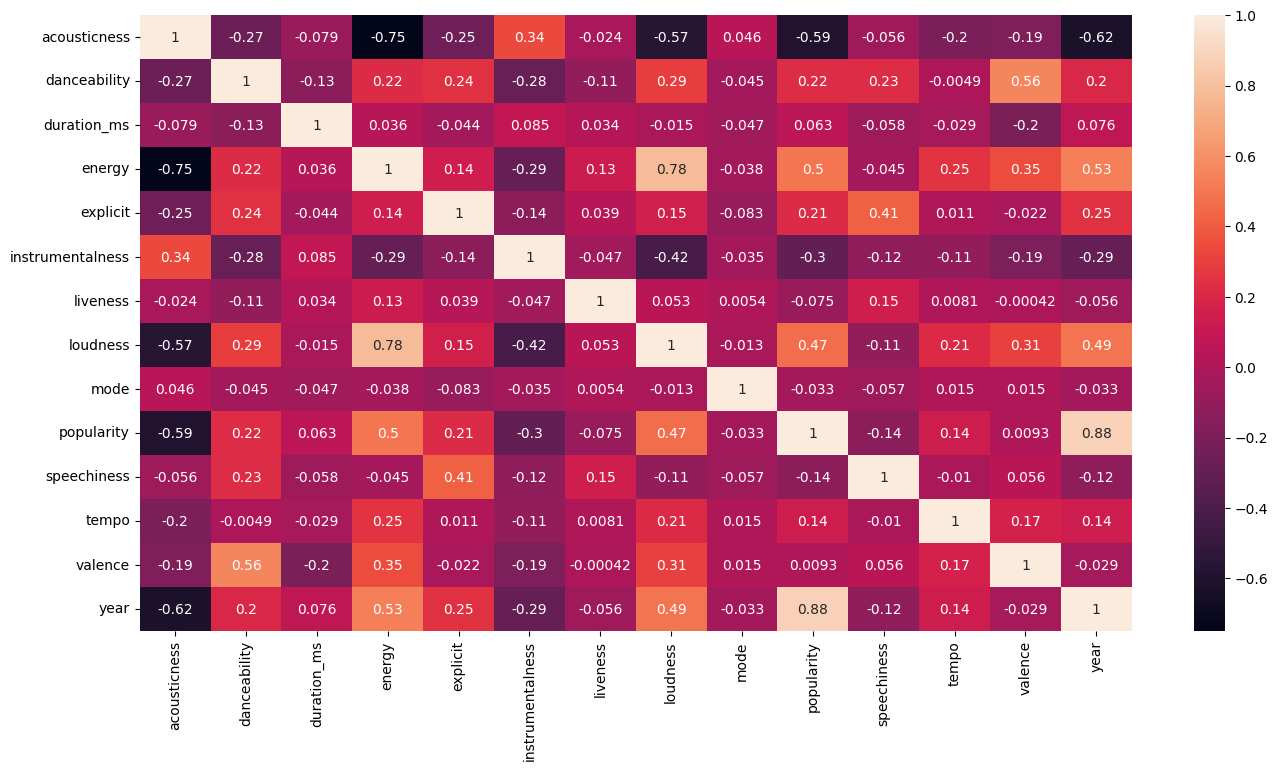

In [97]:
# compute the pairwise correlation coefficient between all the columns but name, artists, year, id, key
new_df2 = new_df.drop(columns=["name", "artists", "id", "key"])
plt.figure(figsize=(16, 8))
sns.heatmap(new_df2.corr(numeric_only=False), annot=True)
plt.show()

From this pairwise correlation, we have : 
- acousticness and energy are strongly correlated with r = -0.75
- acousticness is moderately correlated to loudness with r = -0.56
- acousticness and popularity are moderately correlated with r = -0.59
- danceability is moderately correlated to valence with r = 0.56
- energy is strongly correlated to loudness with r = 0.78
- popularity is moderately correlated to acousticness(-0.59) and strongly correlated to year(0.88)
- year is moderately correlated to acousticness(-0.62), energy(0.53) and strongly correlated to popularity(0.88)

From those observations, some questions pop up :
- will PCA be enough to visualize the underlying structure of those data ? In fact, 8/13 columns are pairwise correlated. And we know that PCA is based on the linear dependence of features. So, is there any linear dependence between all those data ?
- as we are focusing on the popularity of songs, will year and acousticness be enough to predict popularity.

# What makes you popular ?

We are interested on criteria that made a song popular.
On this purpose, we are going to build a linear regressor on the popularity. 
The process will be :
- based on the correlation coefficient, we will select variables for which the correlation coefficient is greater that 0.40
- made successive student's tests to know if we could discard some variables

## Linear regressor

The features we'll use to build the regressor on popularity are : acousticness and year

### Regressor of popularity by year

We saw that popularity is mostly correlated to year.
So let's start with a simple linear regressor of popularity by year

#### Model

In [23]:
popularity = np.array(df_train["popularity"]).reshape(-1,1)
year = np.array(df_train["year"]).reshape(-1,1)

# cross validation score
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
model = LinearRegression()
scores = cross_val_score(model, year, popularity, cv=cv)
print(f"Cross validation score : {scores}")
print(f"We expect {scores.mean()*100} % accuracy with a standard deviation of {scores.std()}")

Cross validation score : [0.77663833 0.774468   0.77765279 0.77701163 0.77258734]
We expect 77.567161771316 % accuracy with a standard deviation of 0.0018770538450655016


In [24]:
# our model
pop_model = LinearRegression().fit(year, popularity)

#### Visualization on the training data

The coefficient of determination is 0.7755349822826931


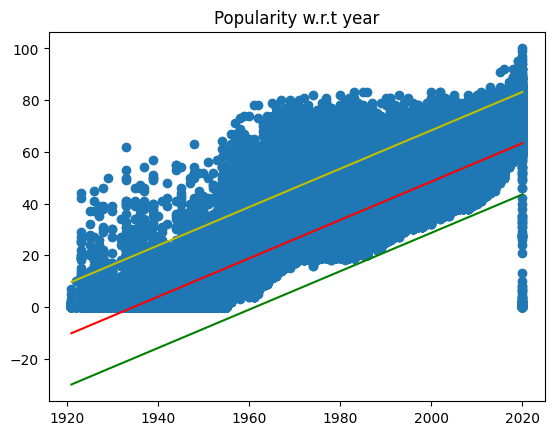

In [42]:
prediction = pop_model.predict(year)
score_simple_train = pop_model.score(year, popularity)
print(f"The coefficient of determination is {score_simple_train}")

# in the remainder, we will build a 95% confidence interval of the values of popularity

# 1. get the residuals
res = np.sum((prediction - popularity)**2)

# 2. get the standard deviation
std = np.sqrt(res/len(prediction)-2)

# 3. compute the interval
interval = std * 1.96

# 4. compute the lower and upperbounds of the interval
low, up = prediction - interval, prediction + interval

# plot the data
plt.scatter(year, popularity)
plt.plot(year, low, c="g")
plt.plot(year, prediction, c="r")
plt.plot(year, up, c="y")
plt.title("Popularity w.r.t year")
plt.show()

In [29]:
pop_model.coef_

array([[0.74271174]])

From the model above, we deduce that 77,55% of the popularity is explained by the year

#### Prediction on test data

Score on test data : 0.7760843681093926
Residual on test data : 160813677142.14365


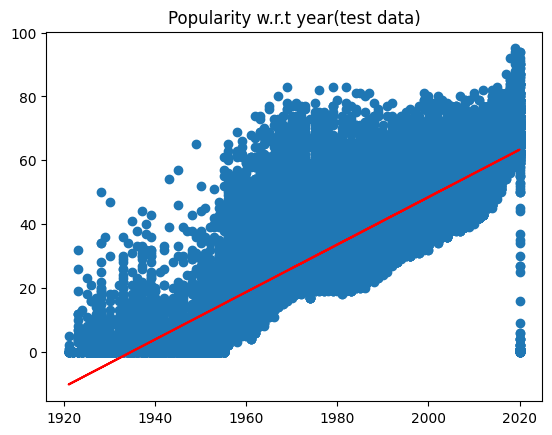

In [43]:
pop_test = np.array(df_test["popularity"]).reshape(-1, 1)
year_test = np.array(df_test["year"]).reshape(-1, 1)
prediction_test = pop_model.predict(year_test)
score_simple_test = pop_model.score(year_test, pop_test)
print(f"Score on test data : {score_simple_test}")
print(f"Residual on test data : {np.sum((prediction_test - year_test)**2)}")

# plot the data
plt.scatter(year_test, pop_test)
plt.plot(year_test, prediction_test, c="r")
plt.title("Popularity w.r.t year(test data)")
plt.show()

### Polynomial regressor of popularity by year

Maybe the relation between popularity and year is polynomial.

So on this part, we want to know which degree of the polynomial is optimal, build a model from that polynomial representation and compare its score to the previous score we got.

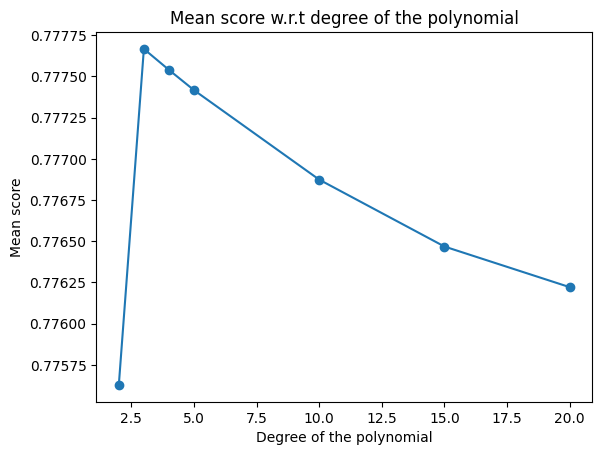

In [57]:
popularity = np.array(df_train["popularity"]).reshape(-1,1)
year = np.array(df_train["year"]).reshape(-1,1)

# cross-validation
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=1)

degrees = [2, 3, 4, 5, 10, 15, 20]
all_scores = np.zeros(len(degrees))

for i in range(len(degrees)):
    x = PolynomialFeatures(degree=degrees[i]).fit_transform(year)
    score = cross_val_score(LinearRegression(), X=x, y=popularity, cv=cv)
    all_scores[i] = score.mean()

plt.plot(degrees, all_scores, marker='o')
plt.title("Mean score w.r.t degree of the polynomial")
plt.xlabel("Degree of the polynomial")
plt.ylabel("Mean score")
plt.show()


We see that the degree of polynomial with the highest mean cross-validation score is 3.

So, we will build year as a polynom of degree 3.

#### Model

In [45]:
# polynomial
year_poly = PolynomialFeatures(degree=3).fit_transform(year)

# our model
model = LinearRegression().fit(year_poly, popularity)

#### Visualization on training data

Coefficient of determination : 0.7775600973501985


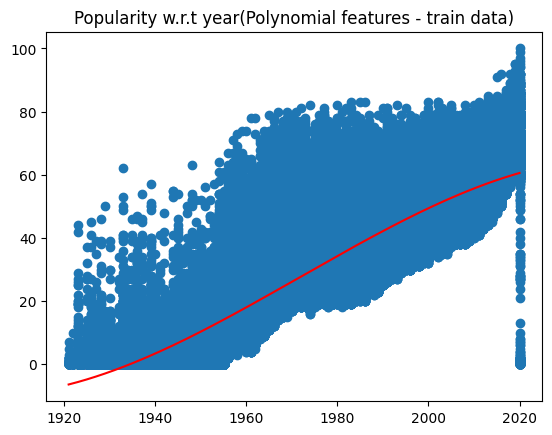

In [46]:
prediction = model.predict(year_poly)
score_poly_train = model.score(year_poly, popularity)
print(f"Coefficient of determination : {score_poly_train}")

# for a nice plot
stack = np.hstack((year, popularity, prediction))
sorted_s = stack[np.argsort(stack[:, 0])]
year, popularity, prediction = np.hsplit(sorted_s, 3)

# plot
plt.scatter(year, popularity)
plt.plot(year, prediction, c="r")
plt.title("Popularity w.r.t year(Polynomial features - train data)")
plt.show()

#### Visualization on test data

Coefficient of determination : 0.7781038312192289


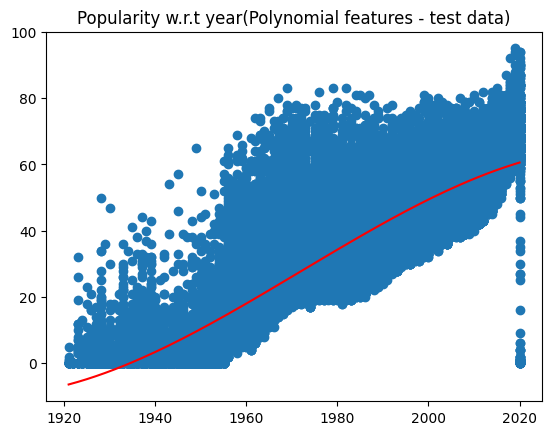

In [47]:
pop_test = np.array(df_test["popularity"]).reshape(-1, 1)
year_test = np.array(df_test["year"]).reshape(-1, 1)

# polynomial
year_test_poly = PolynomialFeatures(degree=3).fit_transform(year_test)

# prediction
prediction = model.predict(year_test_poly)
score_poly_test = model.score(year_test_poly, pop_test)
print(f"Coefficient of determination : {score_poly_test}")

# for a nice plot
stack = np.hstack((year_test, pop_test, prediction))
sorted_s = stack[np.argsort(stack[:, 0])]
year_test, pop_test, prediction = np.hsplit(sorted_s, 3)

# plot
plt.scatter(year_test, pop_test)
plt.plot(year_test, prediction, c="r")
plt.title("Popularity w.r.t year(Polynomial features - test data)")
plt.show()

### Comparison of the scores

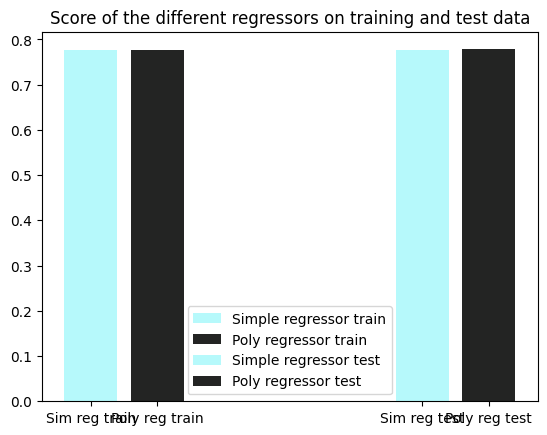

In [56]:
x = [1,2,6,7]
y = [score_simple_train, score_poly_train, score_simple_test, score_poly_test]
colors = ["#b6f9fb", "#232423", "#b6f9fb", "#232423"]
labels = ["Sim reg train", "Poly reg train", "Sim reg test", "Poly reg test"]
labs = ["Simple regressor train", "Poly regressor train", "Simple regressor test", "Poly regressor test"]
plt.bar(x=x, height=y, color=colors, tick_label=labels, label=labs)
plt.title("Score of the different regressors on training and test data")
plt.legend()
plt.show()

The score is almost the same between the 02 models.

#### Multiple linear regressor model

When we look at our data, the curve described is like the square root plot. \
Let us build a multiple linear regressor model

##### Model

In [68]:
year = np.array(df_train["year"]).reshape(-1,1)
features = np.hstack((np.array(year), np.sqrt(np.array(year))))
popularity = np.array(df_train["popularity"]).reshape(-1, 1)
model = LinearRegression().fit(features, popularity)

##### Visualization on training data

Coefficient of determination : 0.7748765698430629
Residuals = 12472960.59859957


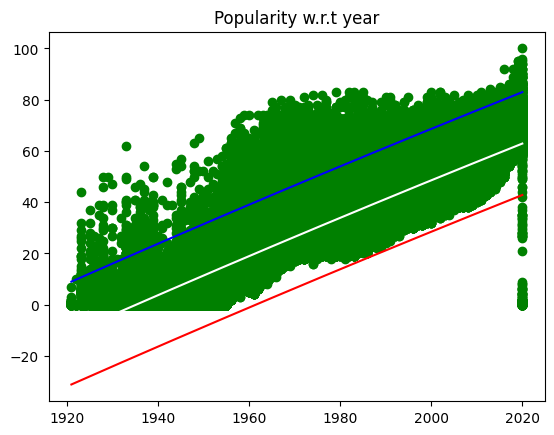

In [69]:
prediction = model.predict(features)
print(f"Coefficient of determination : {model.score(features, popularity)}")

# build a 95% confidence interval

# 1. residuals
res = np.sum((prediction - popularity)**2)
print(f"Residuals = {res}")

# To get a nice plot
stack = np.hstack((year, popularity, prediction))
sorted_s = stack[np.argsort(stack[:, 0])]
year, popularity, prediction = np.hsplit(sorted_s, 3)

# 2. standard deviation
std = np.sqrt(res/(len(prediction)-2))

# 3. interval
interval = std * 1.96

# 4. lower and upperbounds
low, up = prediction - interval, prediction + interval

# Plotting
plt.scatter(year, popularity, c="g")
plt.plot(year, low, c="r")
plt.plot(year, prediction, c="white")
plt.plot(year, up, c="b")
plt.title("Popularity w.r.t year")
plt.show()

In [70]:
model.coef_

array([[ -2.24415823, 265.52598232]])

With this model, we observe a huge reduction of the residuals

### Linear regressor of popularity by year and acousticness

Popularity is moderately correlated to acousticness. \
The question is : if we use year and acousticness, can we get a better prediction of the popularity ? \
Is year only enough to predict the popularity ?

##### Model

In [29]:
year = np.array(df_train["year"]).reshape(-1, 1)
acous = np.array(df_train["acousticness"]).reshape(-1, 1)
pop = np.array(df_train["popularity"]).reshape(-1, 1)
features = np.hstack((year, acous))
mul_model = LinearRegression().fit(features, pop)

##### Visualization on training data

In [73]:
from mpl_toolkits.mplot3d import Axes3D

Coefficient of determination : 0.7793848208940932
Residuals = 12216959.804957494


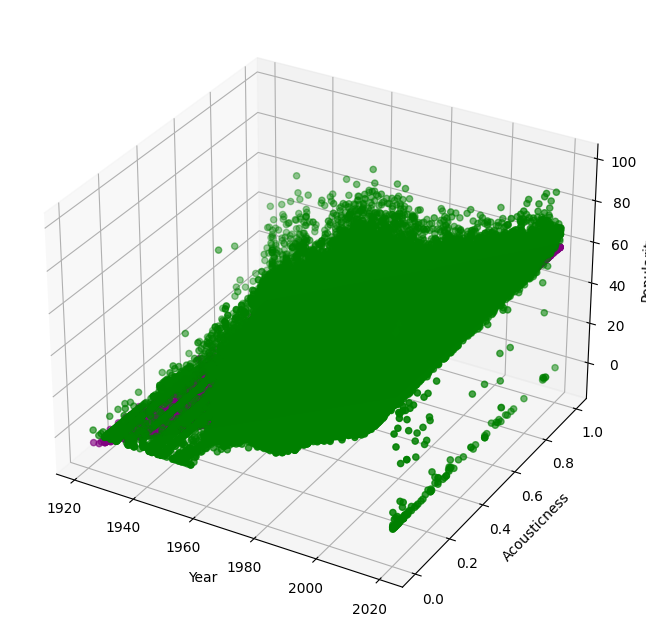

In [35]:
prediction = mul_model.predict(features)
print(f"Coefficient of determination : {mul_model.score(features, pop)}")

# build a 95% confidence interval

# 1. residuals 
res = np.sum((prediction - pop)**2)
print(f"Residuals = {res}")

# 2. standard deviation
std = np.sqrt(res/(len(prediction)-1))

# 3. interval
interval = std * 1.96

# 4. lower and upperbounds
low, up = prediction-interval, prediction+interval

# Plotting
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(year, acous, prediction, c="purple")
ax.scatter(year, acous, pop, c="g")
ax.set_xlabel("Year")
ax.set_ylabel("Acousticness")
ax.set_zlabel("Popularity")
plt.show()

By adding acousticness, we don't have that much difference either on residuals or coefficient of determination.

### Multiple linear regression

On this section, we want to predict popularity using parameters other than year.

We should however notice that we have 13 numerical columns(without popularity) in our dataset. 

In other to build a not too complex model, we will perform feature extraction and only keep the most relevant features for the model.

In [58]:
df_train.shape

(127431, 18)

In [59]:
df_train.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'speechiness', 'tempo', 'valence',
       'year'],
      dtype='object')

In [60]:
df_mult_regressor = df_train.drop(columns=["artists", "explicit", "id", "name"])

In [61]:
df_mult_regressor.shape

(127431, 14)

In [78]:
X = df_mult_regressor.drop(columns=["popularity"])
y = df_mult_regressor["popularity"]

In [63]:
print(X.shape)
y.shape

(127431, 13)


(127431,)

#### Preprocessing 

In [79]:
scaler = StandardScaler()

# take the numerical values
features = ["acousticness", "danceability", "duration_ms", "energy",
            "instrumentalness", "key", "liveness", "loudness",
            "speechiness", "tempo", "valence"]

X[features] = scaler.fit_transform(X[features])

X.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year
76262,1.278748,-2.320752,2.802099,-0.941683,-0.490179,-1.198217,-0.559307,0.218868,1,-0.404184,-0.877979,-1.873505,2002
17634,1.084951,-1.865369,3.281845,-1.117298,0.428302,-0.913731,0.816893,-0.975988,1,-0.351332,0.613174,-1.499529,1954
122247,-1.309854,-1.409987,-0.253833,1.782213,-0.392613,1.646645,3.129360,0.923924,0,0.355143,-1.502207,-0.001340,1981
129965,0.681430,0.360312,-0.372389,0.466971,-0.524748,-1.482703,-0.587508,0.828293,1,-0.378093,0.275804,0.475184,1965
161734,1.321224,-0.220301,-0.359088,0.100796,2.508858,0.793186,-0.553667,0.209869,0,-0.297142,0.138139,1.481601,1930


#### Find the optimal number of features

In [80]:
# cross-validation scheme
cv = KFold(shuffle=True, random_state=1)

# range for the number of features for selection
params = {"n_features_to_select" : list(range(1,13))}

model = LinearRegression()

# grid search
clf = GridSearchCV(
    estimator=RFE(model),
    param_grid=params,
    cv=cv,
    scoring="r2",
    return_train_score=True
)

# fit the model
clf.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid={'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                  11, 12]},
             return_train_score=True, scoring='r2')

In [81]:
print(f"Best parameters : {clf.best_params_}")

Best parameters : {'n_features_to_select': 12}


In [82]:
# let us visualize the result
results = pd.DataFrame(clf.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.461735,0.036216,0.002869,0.000625,1,{'n_features_to_select': 1},0.349009,0.358643,0.351975,0.349890,...,0.352037,0.003444,12,0.352827,0.350421,0.352080,0.352615,0.352412,0.352071,0.000861
1,0.567198,0.167652,0.006551,0.003300,2,{'n_features_to_select': 2},0.376919,0.385542,0.377730,0.377339,...,0.379506,0.003200,11,0.380193,0.378040,0.379981,0.380095,0.379421,0.379546,0.000799
2,0.779607,0.264958,0.012217,0.004202,3,{'n_features_to_select': 3},0.393785,0.400025,0.392605,0.392604,...,0.395301,0.002964,10,0.395732,0.394176,0.396019,0.396037,0.394803,0.395353,0.000741
3,0.994995,0.034288,0.014691,0.009821,4,{'n_features_to_select': 4},0.400553,0.407250,0.399585,0.399566,...,0.402213,0.003021,9,0.402678,0.401007,0.402912,0.402935,0.401785,0.402264,0.000755
4,0.932567,0.035414,0.014049,0.005995,5,{'n_features_to_select': 5},0.783374,0.782919,0.785310,0.781621,...,0.783100,0.001253,8,0.783048,0.783161,0.782565,0.783490,0.783322,0.783117,0.000314
5,0.917541,0.067718,0.011291,0.002618,6,{'n_features_to_select': 6},0.783849,0.783500,0.785682,0.782137,...,0.783584,0.001205,7,0.783536,0.783622,0.783078,0.783968,0.783810,0.783603,0.000302
6,0.837534,0.093738,0.008045,0.002292,7,{'n_features_to_select': 7},0.783836,0.783538,0.785704,0.782214,...,0.783610,0.001193,6,0.783578,0.783651,0.783112,0.783985,0.783848,0.783635,0.000298
7,0.811651,0.031405,0.018320,0.014602,8,{'n_features_to_select': 8},0.783881,0.783599,0.785658,0.782248,...,0.783635,0.001166,5,0.783604,0.783673,0.783159,0.784015,0.783877,0.783666,0.000292
8,0.722223,0.034447,0.015829,0.007130,9,{'n_features_to_select': 9},0.783867,0.783615,0.785702,0.782229,...,0.783636,0.001189,4,0.783631,0.783694,0.783191,0.784043,0.783926,0.783697,0.000294
9,0.612809,0.045166,0.014918,0.004448,10,{'n_features_to_select': 10},0.783930,0.783595,0.785714,0.782302,...,0.783667,0.001173,3,0.783656,0.783739,0.783204,0.784064,0.783941,0.783721,0.000296


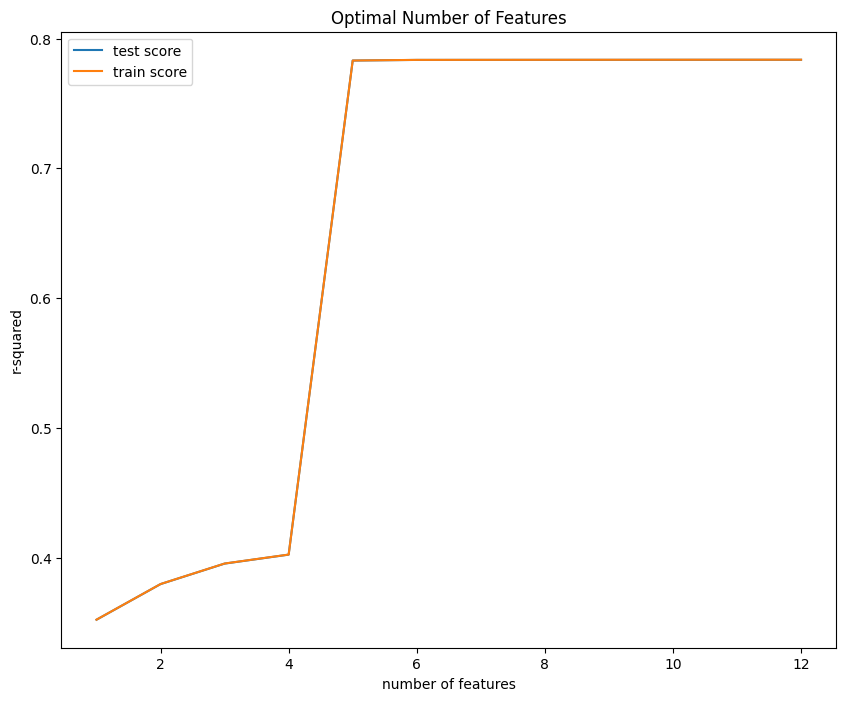

In [87]:
# plotting the results
plt.figure(figsize=(10,8))

plt.plot(results["param_n_features_to_select"], results["mean_test_score"])
plt.plot(results["param_n_features_to_select"], results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')
plt.show()

The 02 plots are overlapping and we see that from 5 features, the score is pretty stable.

So, we're going to use 05 features for our model.

In [ ]:
x = [1,2,6,7]
y = [score_simple_train, score_poly_train, score_simple_test, score_poly_test]
colors = ["#b6f9fb", "#232423", "#b6f9fb", "#232423"]
labels = ["Sim reg train", "Poly reg train", "Sim reg test", "Poly reg test"]
labs = ["Simple regressor train", "Poly regressor train", "Simple regressor test", "Poly regressor test"]
plt.bar(x=x, height=y, color=colors, tick_label=labels, label=labs)
plt.title("Score of the different regressors on training and test data")
plt.legend()
plt.show()

In [88]:
# let us look at the selected features for nb_features = 5
model = LinearRegression()
model.fit(X=X, y=y)

feat_extrac = RFE(model, n_features_to_select=5)
feat_extrac = feat_extrac.fit(X, y)

list(zip(X.columns, feat_extrac.support_, feat_extrac.ranking_))

[('acousticness', True, 1),
 ('danceability', True, 1),
 ('duration_ms', False, 9),
 ('energy', False, 4),
 ('instrumentalness', True, 1),
 ('key', False, 8),
 ('liveness', False, 2),
 ('loudness', False, 5),
 ('mode', False, 3),
 ('speechiness', True, 1),
 ('tempo', False, 6),
 ('valence', False, 7),
 ('year', True, 1)]

The features selected are those with a ranking of 1. 

We then have : acousticness, danceability, instrumentalness, speechiness and year

#### Model

In [89]:
model = LinearRegression()
model.fit(X, y)

model_reduced = RFE(model, n_features_to_select=5)
model_reduced.fit(X, y)

RFE(estimator=LinearRegression(), n_features_to_select=5)

#### Prediction on test data

In [90]:
df_test.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'speechiness', 'tempo', 'valence',
       'year'],
      dtype='object')

In [93]:
# get test data
X_test = df_test.drop(columns=["artists", "explicit", "id", "name", "popularity"])
y_test = df_test["popularity"]

# scale the data
features = ["acousticness", "danceability", "duration_ms", "energy",
            "instrumentalness", "key", "liveness", "loudness",
            "speechiness", "tempo", "valence"]

X_test[features] = scaler.fit_transform(X_test[features])

pred = model_reduced.predict(X_test)

score = model_reduced.score(X_test, y_test) 

print(f"Coefficient of determination : {score}")

Coefficient of determination : 0.7836204194826688


In [111]:
score_train = model_reduced.score(X, y)
score_train

0.7831160552350127

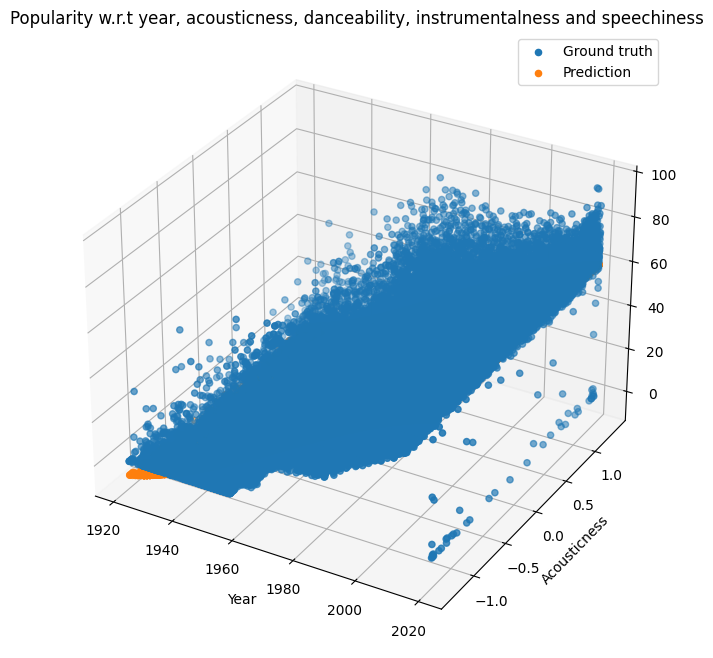

In [107]:
year = np.array(X_test["year"]).reshape(-1, 1)
popularity = np.array(y_test).reshape(-1, 1)
acous = np.array(X_test["acousticness"]).reshape(-1, 1)

# to get a nice plot
stack = np.hstack((year, popularity, pred.reshape(-1, 1)))
sorted_st = stack[np.argsort(stack[:,0])]
year, popularity, pred = np.hsplit(sorted_s, 3)


# plot
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(year, acous, popularity, label="Ground truth")
ax.scatter(year, acous, pred, label="Prediction")
ax.set_xlabel("Year")
ax.set_ylabel("Acousticness")
ax.set_title("Popularity w.r.t year, acousticness, danceability, instrumentalness and speechiness")
plt.legend()
plt.show()

### Final comparison of the scores

The aim of this section is to compare all our models in training and test data.

Also, this is the occasion to see if we have any underfitting or overfitting. And if so, we will build a regularized version.

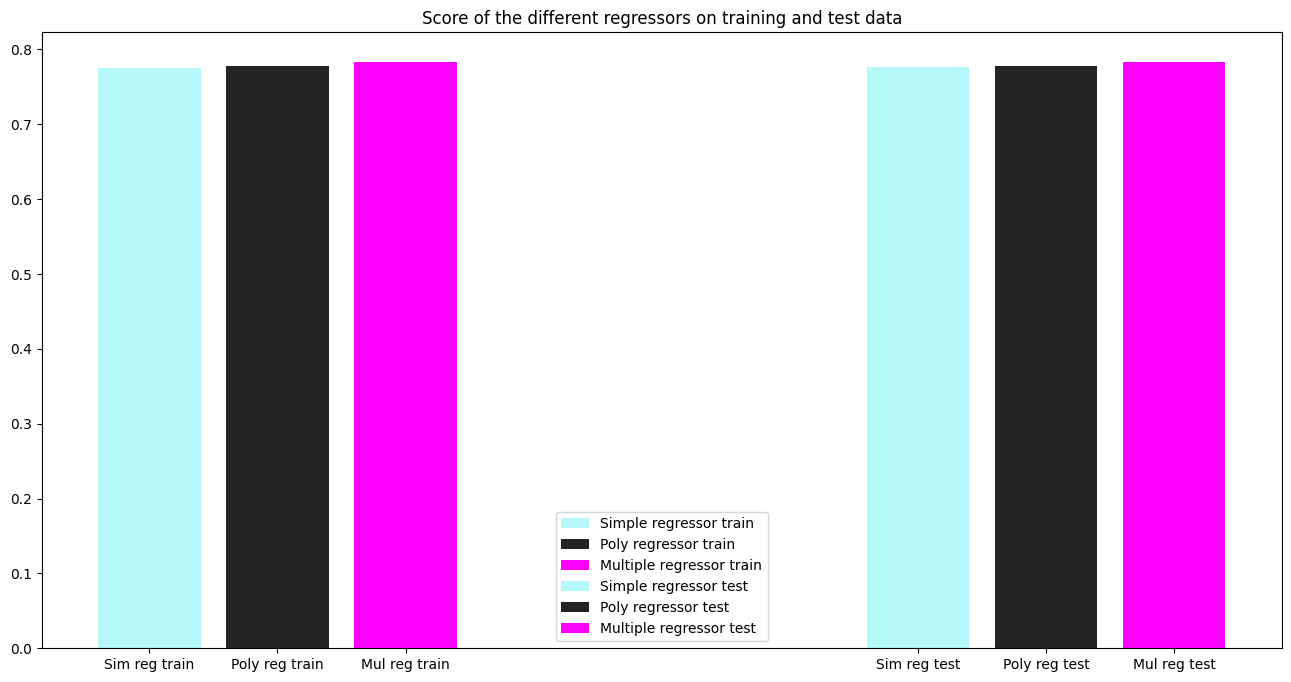

In [121]:
plt.figure(figsize=(16,8))
x = [1,2,3,7,8,9]
y = [score_simple_train, score_poly_train, score_train, score_simple_test, score_poly_test, score]
colors = ["#b6f9fb", "#232423", "#ff00ff", "#b6f9fb", "#232423", "#ff00ff"]
labels = ["Sim reg train", "Poly reg train", "Mul reg train", "Sim reg test", "Poly reg test", "Mul reg test"]
labs = ["Simple regressor train", "Poly regressor train", "Multiple regressor train", "Simple regressor test", "Poly regressor test", 
        "Multiple regressor test"]
plt.bar(x=x, height=y, color=colors, tick_label=labels, label=labs)
plt.title("Score of the different regressors on training and test data")
plt.legend()
plt.show()

**Conclusion :** 
The multiple linear regressor is slightly better(training and test data) than the other regressors due to the other features(acousticness, danceability, instrumentalness and speechiness) it adds.

Also, we see that the score at test time is almost the same as the score at training time. So, there is no underfitting or overfitting. We could then trust our model.

That ends the study of a regressor model for popularity.

### Prediction on the most popular songs over years

#### Get those most popular songs

In [108]:
pivot = pd.pivot_table(
    data = df,
    values = ["popularity"],
    index = ["year"],
    aggfunc= {"popularity" : np.max}
)

In [109]:
pivot

,popularity
year,
1921,7
1922,10
1923,44
1924,13
1925,37
...,...
2016,92
2017,87
2018,92


In [44]:
new_df = pd.merge(left=df, right=pivot, on=["year","popularity"], how="inner")

In [45]:
new_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.731934,'Dennis Day',0.818848,180533,0.341064,False,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160034,-12.441,True,Clancy Lowered the Boom,7,1921,0.415039,60.936,0.962891,1921
1,0.673828,'Uli',0.645020,126903,0.445068,False,35iwgR4jXetI318WEWsa1Q,0.744141,0,0.151001,-13.338,True,Carve,10,1922-02-22,0.450928,104.851,0.126953,1922
2,0.996094,'Bessie Smith',0.613770,177133,0.042297,False,2wAfHM7Whz67VFbdanhZlk,0.002930,4,0.182983,-12.033,True,Nobody Knows You When You're Down and Out,44,1923,0.053497,89.822,0.211060,1923
3,0.815918,"'Paul Whiteman & His Orchestra', 'Bix Beiderbe...",0.678223,206000,0.395020,False,59UEylF5pnWCXm91Hzk2Q9,0.239990,3,0.099976,-9.825,True,Mississippi Mud (feat. Bix Beiderbecke),13,1924,0.133057,184.446,0.832031,1924
4,0.969238,'Tommy Dorsey',0.678223,194320,0.175049,False,3XDharvL8vEyxdQwOQKmww,0.001050,3,0.177002,-13.021,True,"On the Sunny Side of the Street (From ""Is Ever...",37,1925,0.030106,112.941,0.580078,1925


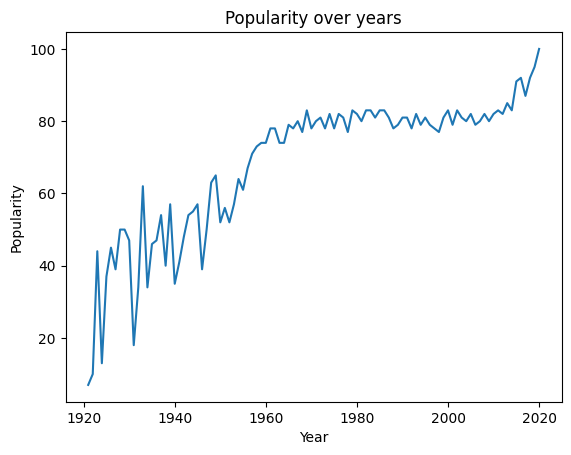

In [46]:
plt.title("Popularity over years")
plt.plot(new_df["year"], new_df["popularity"])
plt.xlabel("Year")
plt.ylabel("Popularity")
plt.show()

#### Prediction

Coefficient of determination : -3.8919172375249635
Residuals : 204683.5525692885


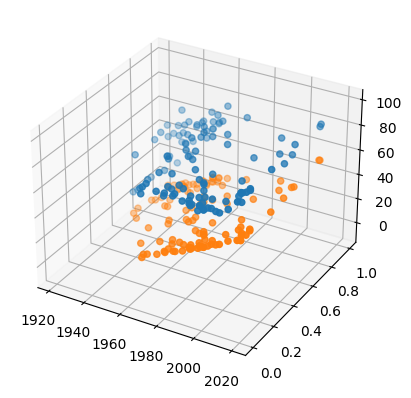

In [54]:
# get the data
pop = np.array(new_df["popularity"]).reshape(-1, 1)
year = np.array(new_df["year"]).reshape(-1, 1)
acous = np.array(new_df["acousticness"]).reshape(-1, 1)
energy = np.array(new_df["energy"]).reshape(-1, 1)
loudness = np.array(new_df["loudness"]).reshape(-1, 1)
features = np.hstack((year, acous, energy, loudness))

# prediction
prediction = model_mult.predict(features)

print(f"Coefficient of determination : {model_mult.score(features, pop)}")

# residuals
res = np.sum((prediction - pop)**2)
print(f"Residuals : {res}")

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(year, acous, pop)
ax.scatter(year, acous, prediction)
plt.show()

The model is bad because the coefficient of determination is negative. 

# Models

## Some importations

In [2]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.preprocessing import PolynomialFeatures

## Regression Models

### Linear Regression of loudness

On this part, we're going to build a regressor on the loudness given the energy

#### Training phase

In [13]:
model = LinearRegression()
energy = np.array(df_train["energy"]).reshape(-1, 1)
loudness = np.array(df_train["loudness"]).reshape(-1,1)
model.fit(energy, loudness)

LinearRegression()

Residuals = 1482664.490956728
The coefficient of determination is 0.6130485873460361


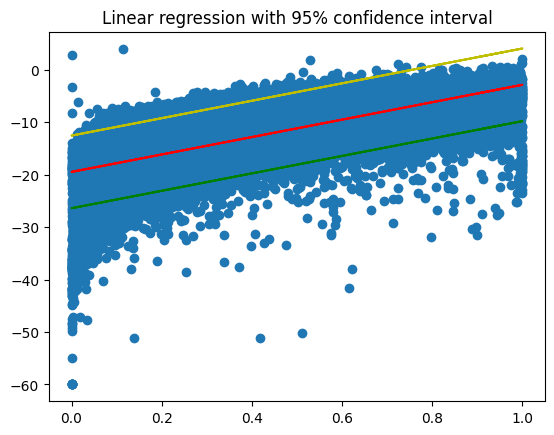

In [20]:
# Prediction on the training data
pred = model.predict(energy)

# Get the residuals
res = np.sum((pred-loudness)**2)
print(f"Residuals = {res}")

# Get the coefficient of determination
coef = model.score(energy, loudness)
print(f"The coefficient of determination is {coef}")

# Build a 95% confidence interval
std = np.sqrt((1/(len(loudness)-2))*res)
interval = (std * 1.96)
low, up = pred - interval, pred + interval

# Plot the data and the model
plt.title("Linear regression with 95% confidence interval")
plt.scatter(df_train["energy"], df_train["loudness"])
plt.plot(energy, low, c="g")
plt.plot(energy, pred, c="r")
plt.plot(energy, up, c="y")
plt.show()



In [21]:
print(model.coef_)

[[16.60516406]]


Observation :
We only have a score of 61,30% on training data. So, a simple linear regression of loudness with energy is not enough

#### Testing step

In [22]:
pred2 = model.predict(np.array(df_test["energy"]).reshape(-1,1))

score = model.score(np.array(df_test["energy"]).reshape(-1,1), np.array(df_test["loudness"]).reshape(-1,1))

print(f"Score = {score}")

Score = 0.6130859573184437


The score in testing data is a bit greater than the score in the training data. 

### Multiple linear regression of loudness with energy

#### Training phase

Score on training data : 0.6944451881403634


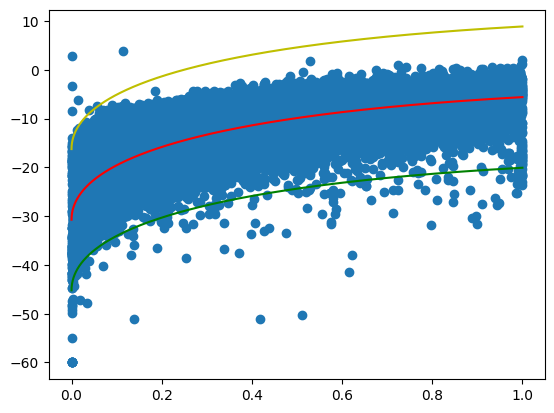

In [30]:
model_mult = LinearRegression()
energies = np.hstack((np.asarray(df_train["energy"]).reshape(-1,1), np.sqrt(np.asarray(df_train["energy"]).reshape(-1,1))))

# fit the model
model_mult.fit(energies, loudness)

# prediction training set
loudness_pred = model_mult.predict(energies)

# To get a nice plot
stack = np.hstack((energy, loudness, loudness_pred))
sorted_s = stack[np.argsort(stack[:, 0])]
energy2, loudness2, loudness_pred = np.hsplit(sorted_s, 3)

# score training data
score = model_mult.score(energies, loudness)
print(f"Score on training data : {score}")

# Compute a 95% confidence interval of the prediction
sum_errs = np.sum((loudness_pred - loudness)**2)
std = np.sqrt((1/(len(loudness)-2)) * sum_errs)
interval = 1.96 * std
low, up = loudness_pred - interval, loudness_pred + interval

# Plot 
plt.scatter(df_train["energy"], df_train["loudness"])
plt.plot(energy2, low, c="g")
plt.plot(energy2, loudness_pred, c="r")
plt.plot(energy2, up, c="y")
plt.show()

We get a better score and a better confidence interval

#### Testing

In [31]:
energies_test = np.hstack((np.asarray(df_test["energy"]).reshape(-1,1), np.sqrt(np.asarray(df_test["energy"]).reshape(-1,1))))

# prediction
loudness_predictions = model_mult.predict(energies_test)

# score
score1 = model_mult.score(energies_test, np.array(df_test["loudness"]).reshape(-1,1))

print(f"Score on test data = {score1}")

Score on test data = 0.6906821928115233


In [32]:
print(f"Difference of score between test data and training data : {score1 - score}")

Difference of score between test data and training data : -0.0037629953288400575


The score is a bit better on traing data

### Polynomial Ridge Regression on loudness given energy

#### Training step

Score = 0.6130485789009723
Ridge with degree = 1


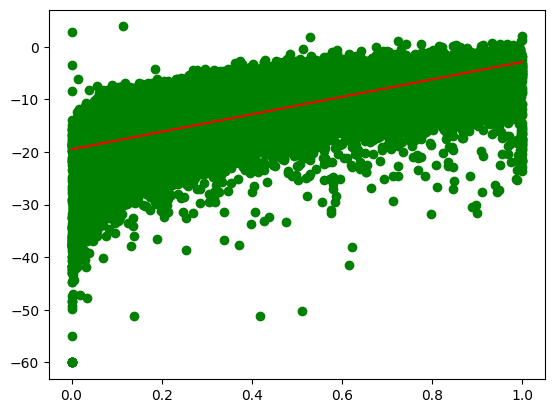

Score = 0.6684825016446907
Ridge with degree = 2


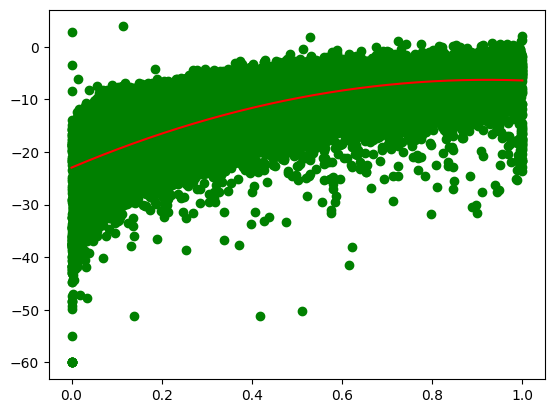

Score = 0.6856998841526967
Ridge with degree = 3


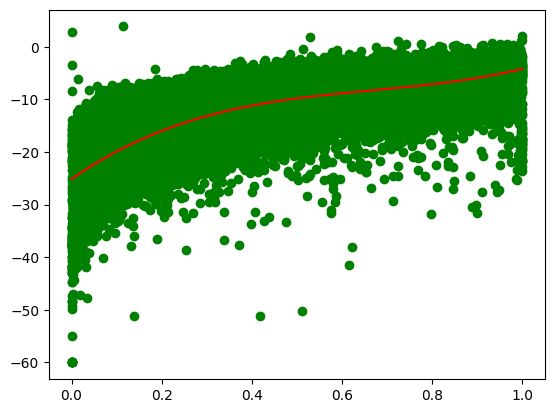

Score = 0.6873678751268928
Ridge with degree = 6


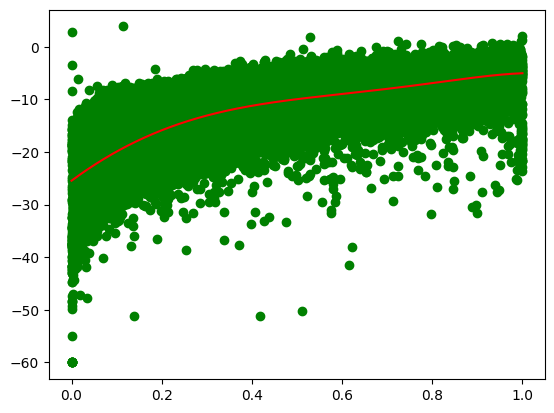

Score = 0.6873791344678727
Ridge with degree = 9


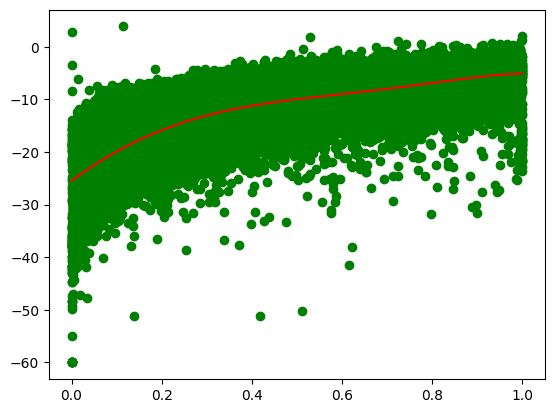

Score = 0.687692814540994
Ridge with degree = 12


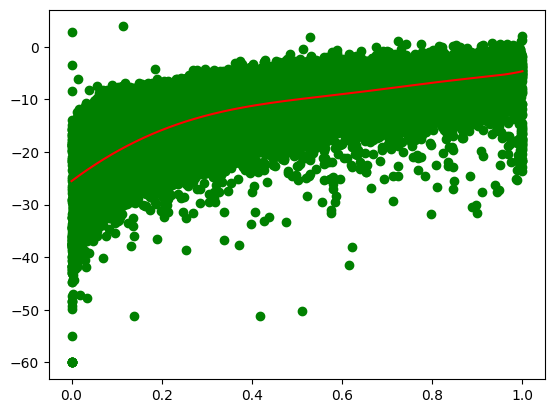

Score = 0.6876439153004057
Ridge with degree = 15


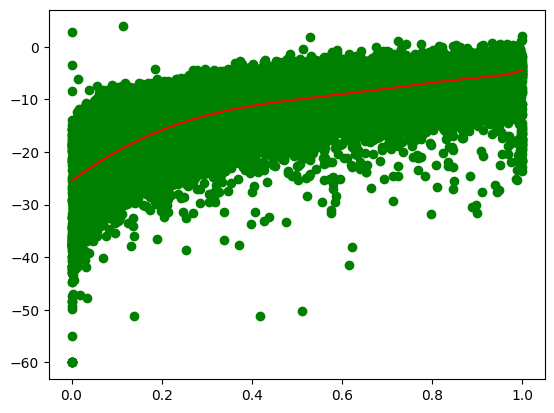

Score = 0.687725764215471
Ridge with degree = 18


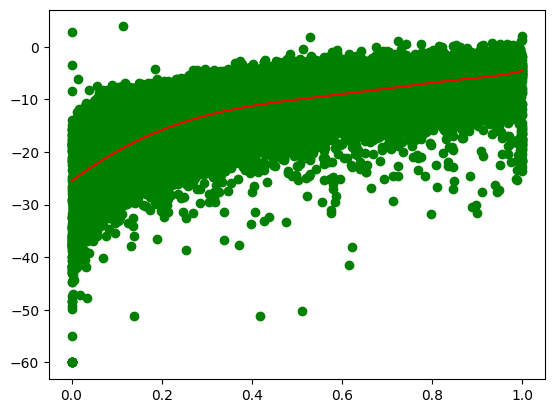

Score = 0.6878416686026382
Ridge with degree = 20


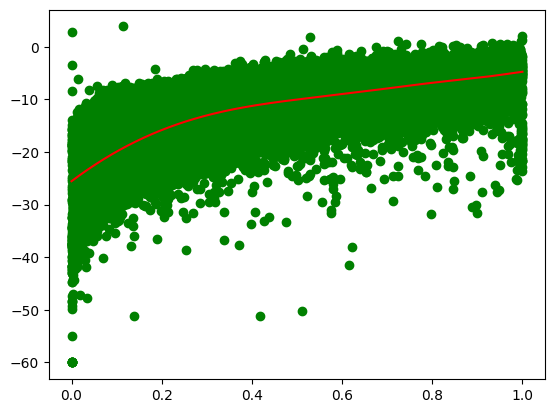

Score = 0.6881148611618053
Ridge with degree = 30


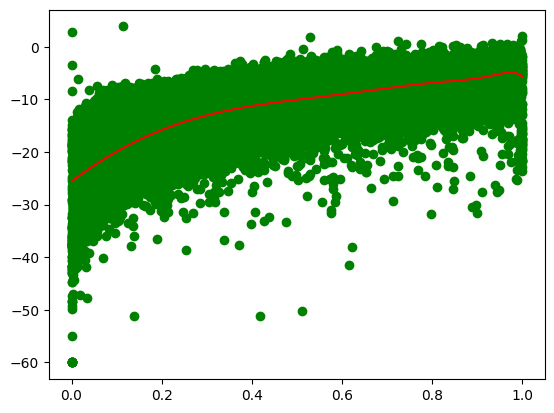

In [42]:
for deg in [1,2,3,6,9,12,15,18,20,30]:
    energy_deg = PolynomialFeatures(degree=deg).fit_transform(energy)[:,1:]
    model = Ridge()
    model.fit(energy_deg, loudness)
    
    # train the regressor on training set
    pred = model.predict(energy_deg)
    
    print(f"Score = {model.score(energy_deg, loudness)}")
    
    # For a nice plot
    stack = np.hstack((energy, pred))
    sorted_s = stack[np.argsort(stack[:,0])]
    energy2, pred = np.hsplit(sorted_s, 2)
    
    # plot
    print(f"Ridge with degree = {deg}")
    plt.scatter(df_train["energy"], df_train["loudness"], c="g")
    plt.plot(energy2, pred, c="r")
    plt.show()

The highest is the degree of the polynom, the better is the score. But we reach a limit of score on degree 12 where, whenever the increase of the degree, the score remains stable. The max score is 68%

#### Testing step

In [44]:
energy2 = np.array(df_test["energy"]).reshape(-1,1)
loudness2 = np.asarray(df_test["loudness"]).reshape(-1,1)
energy_deg = PolynomialFeatures(degree=30).fit_transform(energy2)[:,1:]
    
# train the regressor on training set
pred = model.predict(energy_deg)

print(f"Score on test data = {model.score(energy_deg, loudness2)}")

Score = 0.6857588178544347


### Lasso multiple linear regression

#### Training step

In [4]:
# training step
energy = np.array(df_train["energy"]).reshape(-1,1)
loudness = np.array(df_train["loudness"]).reshape(-1,1)
for deg in [1,2,3,6,9]:
    energy_deg = PolynomialFeatures(degree=deg).fit_transform(energy)[:,1:]
    model = Lasso()
    model.fit(energy_deg, loudness)
    
    # train the regressor on training set
    pred = model.predict(energy_deg)
    
    print(f"Score = {model.score(energy_deg, loudness)}")
    
    # plot
    print(f"Lasso with degree = {deg}")
    plt.scatter(df_train["energy"], df_train["loudness"], c="g")
    plt.plot(energy_deg, pred, c="r")
    plt.show()

NameError: name 'np' is not defined

# Classification of mode

## Visualization

### Amount of different modes

There are 2 modes : minor(0) and major(1). \
Let us look at the amount of each mode on the training set

In [42]:
nb_major = len(new_df[new_df["mode"] == 1])
nb_minor = len(new_df[new_df["mode"] == 0])

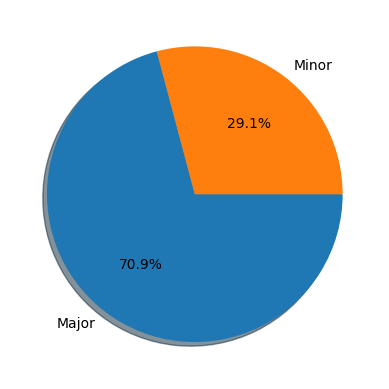

In [43]:
plt.pie(x=[nb_major, nb_minor], labels=["Major", "Minor"], counterclock=False, shadow=True, autopct='%1.1f%%')
plt.show()

The mode seems to be imbalanced.\
We will thus perform data reduction.

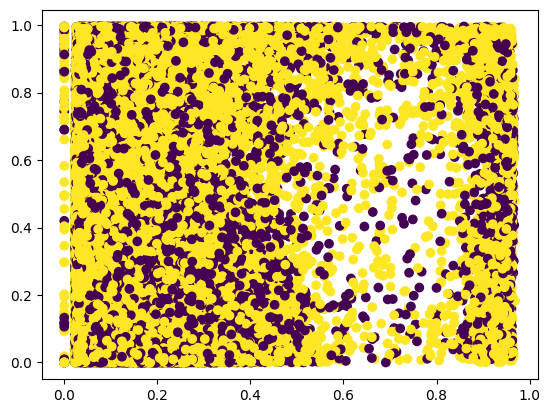

In [44]:
plt.scatter(np.array(new_df["speechiness"]), np.array(new_df["acousticness"]), c=np.array(new_df["mode"]))
plt.show()

### Sparsity matrix

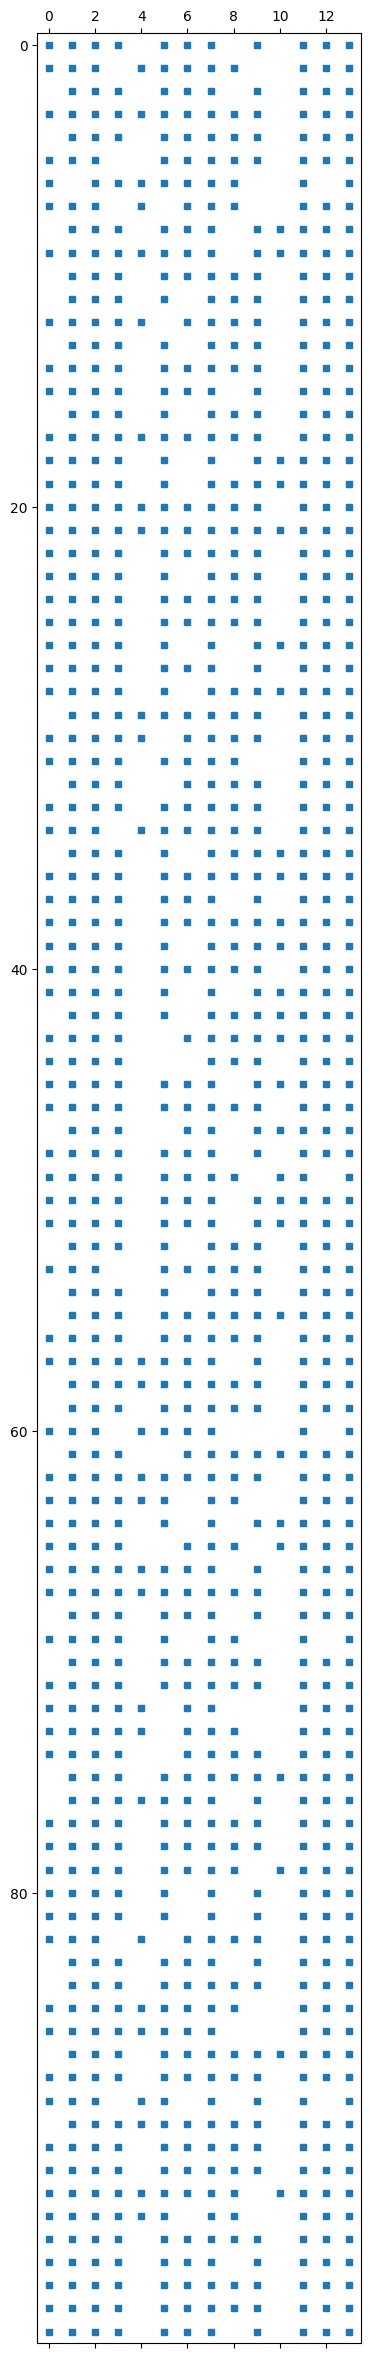

In [59]:
temp = df_train.drop(columns=["name", "id", "explicit", "artists"])
plt.figure(figsize=(10, 30))
plt.spy(temp[:100].values, precision=0.1, markersize=5)
plt.show()

## Downsample the data

In [33]:
print(len(new_df))
print(f"Number of minors : {len(new_df[new_df['mode'] == 0])}")
print(f"Number of majors : {len(new_df[new_df['mode'] == 1])}")

169909
Number of minors : 49519
Number of majors : 120390


We actually have 169909 data.\
But we know that support vector machine performs well on small amount of data.\ 
That's the reason why we will downsample those data to make sure we get 1000 of each category.

1. Split the dataframe into major and minors

In [34]:
df_svm = new_df.drop(columns=["name", "id", "explicit", "artists"])

In [35]:
df_svm_major = df_svm[df_svm["mode"] == 1]
df_svm_minor = df_svm[df_svm["mode"] == 0]

2. Downsample of df_svm_major

In [36]:
df_major_downsampled = resample(df_svm_major,
                                replace=False,
                                n_samples=1000,
                                random_state=1)

In [37]:
# check its length
len(df_major_downsampled)

1000

In [38]:
# check no duplicates
df_major_downsampled.drop_duplicates(inplace=True)

In [39]:
len(df_major_downsampled)

1000

3. Downsample of df_svm_minor

In [40]:
df_minor_downsampled = resample(df_svm_minor,
                                replace=False,
                                n_samples=1000,
                                random_state=1)

In [41]:
# check the length
len(df_minor_downsampled)

1000

In [42]:
# check duplicates
df_minor_downsampled.drop_duplicates(inplace=True)

In [43]:
len(df_minor_downsampled)

1000

Everything is ok

4. Merge the 02 dataframes

In [44]:
new_df_svm = pd.concat((df_major_downsampled, df_minor_downsampled))
len(new_df_svm)

2000

That's greatttt !!!

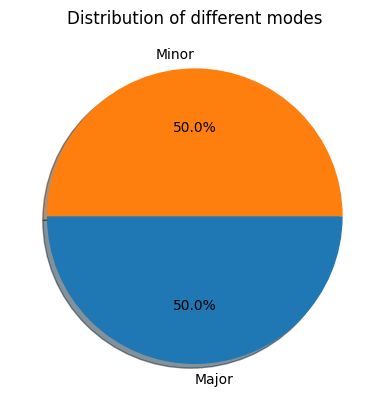

In [45]:
nb_major = len(new_df_svm[new_df_svm["mode"] == 1])
nb_minor = len(new_df_svm[new_df_svm["mode"] == 0])
plt.title("Distribution of different modes")
plt.pie(x=[nb_major, nb_minor], labels=["Major", "Minor"], counterclock=False, shadow=True, autopct='%1.1f%%')
plt.show()

## Splitting

In [48]:
X = new_df_svm.drop(columns=["mode"]).copy()
X.reset_index(drop=True, inplace=True)
X.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence,year
0,0.698000,0.445,391987,0.5440,0.477,9,0.1150,-10.925,51,0.0314,101.172,0.222,2006
1,0.994000,0.442,203947,0.3730,0.730,5,0.1670,-9.020,0,0.0436,133.024,0.698,1940
2,0.000036,0.480,233000,0.7930,0.197,2,0.0732,-10.209,50,0.0892,96.062,0.425,1994
3,0.943000,0.617,174533,0.0229,0.000,0,0.0721,-19.924,16,0.0642,75.684,0.297,1945
4,0.399000,0.629,234133,0.7840,0.000,1,0.3100,-6.435,39,0.3790,89.926,0.700,1998


In [49]:
y = new_df_svm["mode"].copy()
y.reset_index(drop=True, inplace=True)
y.head()

0    1
1    1
2    1
3    1
4    1
Name: mode, dtype: int8

## Centering and Scaling the data

In [50]:
from sklearn.preprocessing import scale

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [52]:
print(len(X_train_scaled))
len(X_test_scaled)

1500


500

## Preliminary Support Vector Machine

After all that cleaning part, let us dive into SVMMMMMM !!!

### Model

In [53]:
clf_svm = SVC(random_state=1)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=1)

### Test on the testing dataset + Confusion matrix

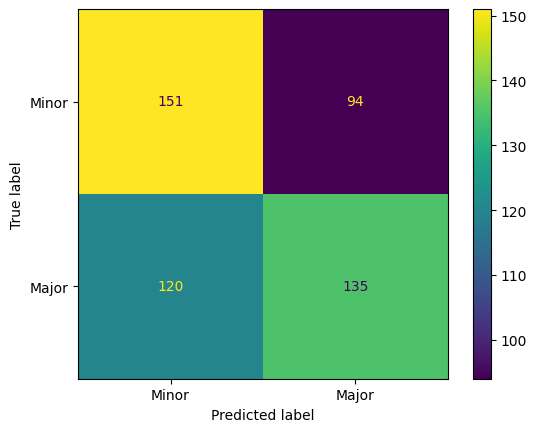

In [54]:
ConfusionMatrixDisplay.from_estimator(clf_svm, X_test_scaled, y_test, display_labels=["Minor", "Major"])
plt.show()

In the confusion matrix, we can see that from 245 songs that were minor, 151(61.63%) were correctly classified. \
And from the 255 songs that were major, 135(52.94) were correctly classified.\
We got thus an accuracy of 53.2%. \
Let us improve those results by cross validation.

## Optimization of the parameters with cross validation and GridSearchCV()

The goal here is to find the best value for **gamma**(recall the formula of the gaussian kernel) and the parameter C.

In [55]:
# instantiate gridsearchcv
clf = GridSearchCV(
    estimator=SVC(),
    param_grid = {
        "C" : [0.5, 1, 10, 100],
        "gamma" : ["scale", 1, 0.1, 0.01, 0.001, 0.0001],
        "kernel" : ["rbf"]
    }
)

# fit the data
clf.fit(X_train_scaled, y_train)

# get the best parameters
print(clf.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


Best paramters : 
    C : 1,
    gamma : 1,
    kernel : "rbf"

## Final SVM

Now let us plot the optimal values of the parameters to the model.

### Model

In [56]:
clf_svm = SVC(random_state=1, gamma=1)
clf_svm.fit(X_train_scaled, y_train)

SVC(gamma=1, random_state=1)

### Test + Confusion Matrix

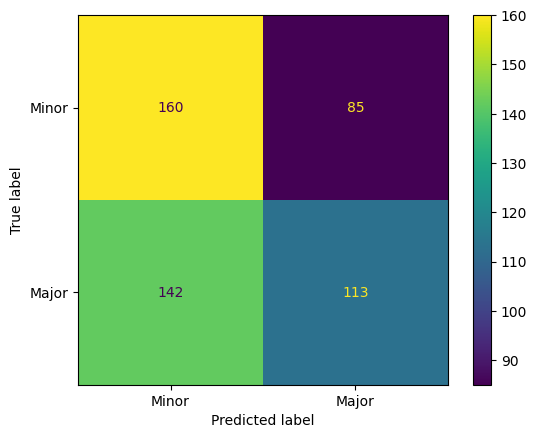

In [57]:
ConfusionMatrixDisplay.from_estimator(clf_svm, X_test_scaled, y_test, display_labels=["Minor", "Major"])
plt.show()

Final accuracy : 54.6.\
Our classifier is pretty bad.

## Plot of the SVM hyperplane

In [118]:
df_svm.shape

(169909, 14)

### Features for data representation

Our original dataframe has 13 columns(without "mode" column).\
And fortunately, we can't represent data in 13 dimensions. \
Godthanks, PCA exists. So, we'll perform PCA on X_train_scaled

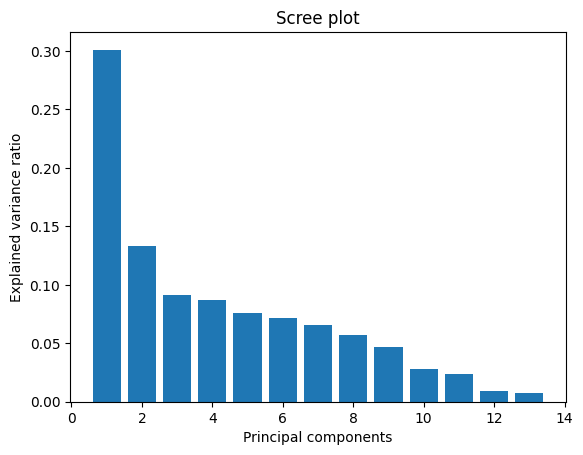

In [58]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

plt.title("Scree plot")
plt.bar(np.arange(1, len(pca.components_)+1), pca.explained_variance_ratio_)
plt.xlabel("Principal components")
plt.ylabel("Explained variance ratio")
plt.show()

### Train of the classifier on those data

Now let us train our classifier on those specific data

In [131]:
X_train_pca[:2, :2]

array([[-0.02420233,  0.75303351,  0.02463755],
       [ 2.45976326, -0.07275606, -0.6481007 ]])

In [82]:
# scale the 3 first components
pca_scaled = scale(X_train_pca[:, :2])

In [129]:
pca_scaled.shape

(1500, 3)

In [83]:
pca_scaled[:2]

array([[-0.01223317,  0.57234511,  0.02261243],
       [ 1.24329775, -0.05529843, -0.59482908]])

In [84]:
clf = GridSearchCV(
    estimator = SVC(),
    param_grid = {
        "C" : [0.5, 1, 10, 100],
        "gamma" : ["scale", 1, 0.1, 0.01, 0.001, 0.0001],
        "kernel" : ["rbf"]
    },
    scoring = "accuracy"
)

# fit the data
clf.fit(pca_scaled, y_train)

# get the best parameters
print(clf.best_params_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [85]:
# train the model with the best parameters
clf_svm = SVC(random_state=1, C=1, gamma=0.1)
clf_svm.fit(pca_scaled, y_train)

SVC(C=1, gamma=0.01, random_state=1)

### Test of the classifier

In [88]:
X_test_pca = pca.transform(X_test_scaled)

# let us create a matrix of points to show the decision regions
x_min = X_test_pca[:, 0].min() - 1
x_max = X_test_pca[:, 0].max() + 1

y_min = X_test_pca[:, 1].min() - 1
y_max = X_test_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, step=0.1),
                         np.arange(y_min, y_max, step=0.1))

prediction = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))

In [115]:
clf_svm.score(X_test_pca[:,:2], y_test)

0.556

In [90]:
prediction.shape

(1174257,)

In [91]:
prediction = prediction.reshape(xx.shape)
prediction.shape

(133, 109, 81)

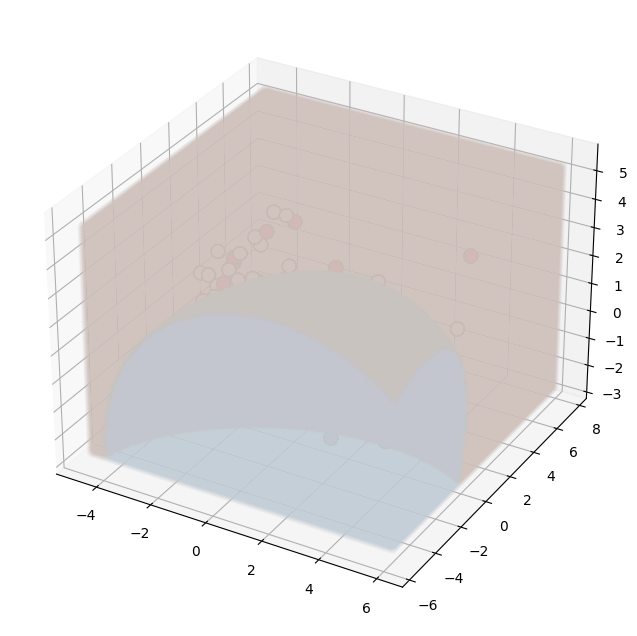

In [119]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
cmap = colors.ListedColormap(["white", "red"])
ax.contour(xx, yy, prediction, cmap=cmap, alpha=0.1)
ax.scatter(X_test_pca[:,0], X_test_pca[:,1],
           c = y_test,
           cmap = cmap,
           s = 100,
           edgecolors = "k",
           alpha = 1)
plt.show()


# Clustering

On this section, we are going to perform clustering using k-means algorithm. \
The goal is to see if we got any cluster over the points.\
For the sake of complexity, we are going to take data represented in the PCA space and as features the 3 first components and we will come back to our original data in the end to explain those clusters.

In [3]:
from sklearn.cluster import KMeans

In [29]:
data = pca_space_df.iloc[:, :3]
data.shape

(169909, 3)

In [30]:
X = np.array(data)

In [32]:
values_k = np.arange(1,21)
scores = np.zeros(len(values_k)+1)
for i in values_k:
    kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(X)
    scores[i] = kmeans.score(X)

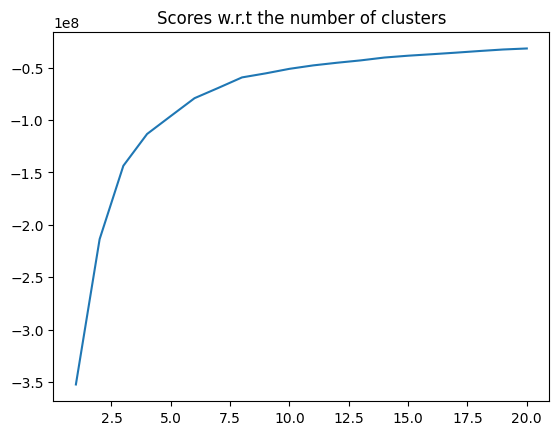

In [33]:
plt.title("Elbow plot")
plt.plot(np.arange(1,21), scores[1:])
plt.show()

The good number of clusters is 6. \
Now let us plot our data with their labels.

In [34]:
kmeans = KMeans(n_clusters=6, random_state=0, n_init="auto").fit(X)
centroids, labels = kmeans.cluster_centers_, kmeans.labels_

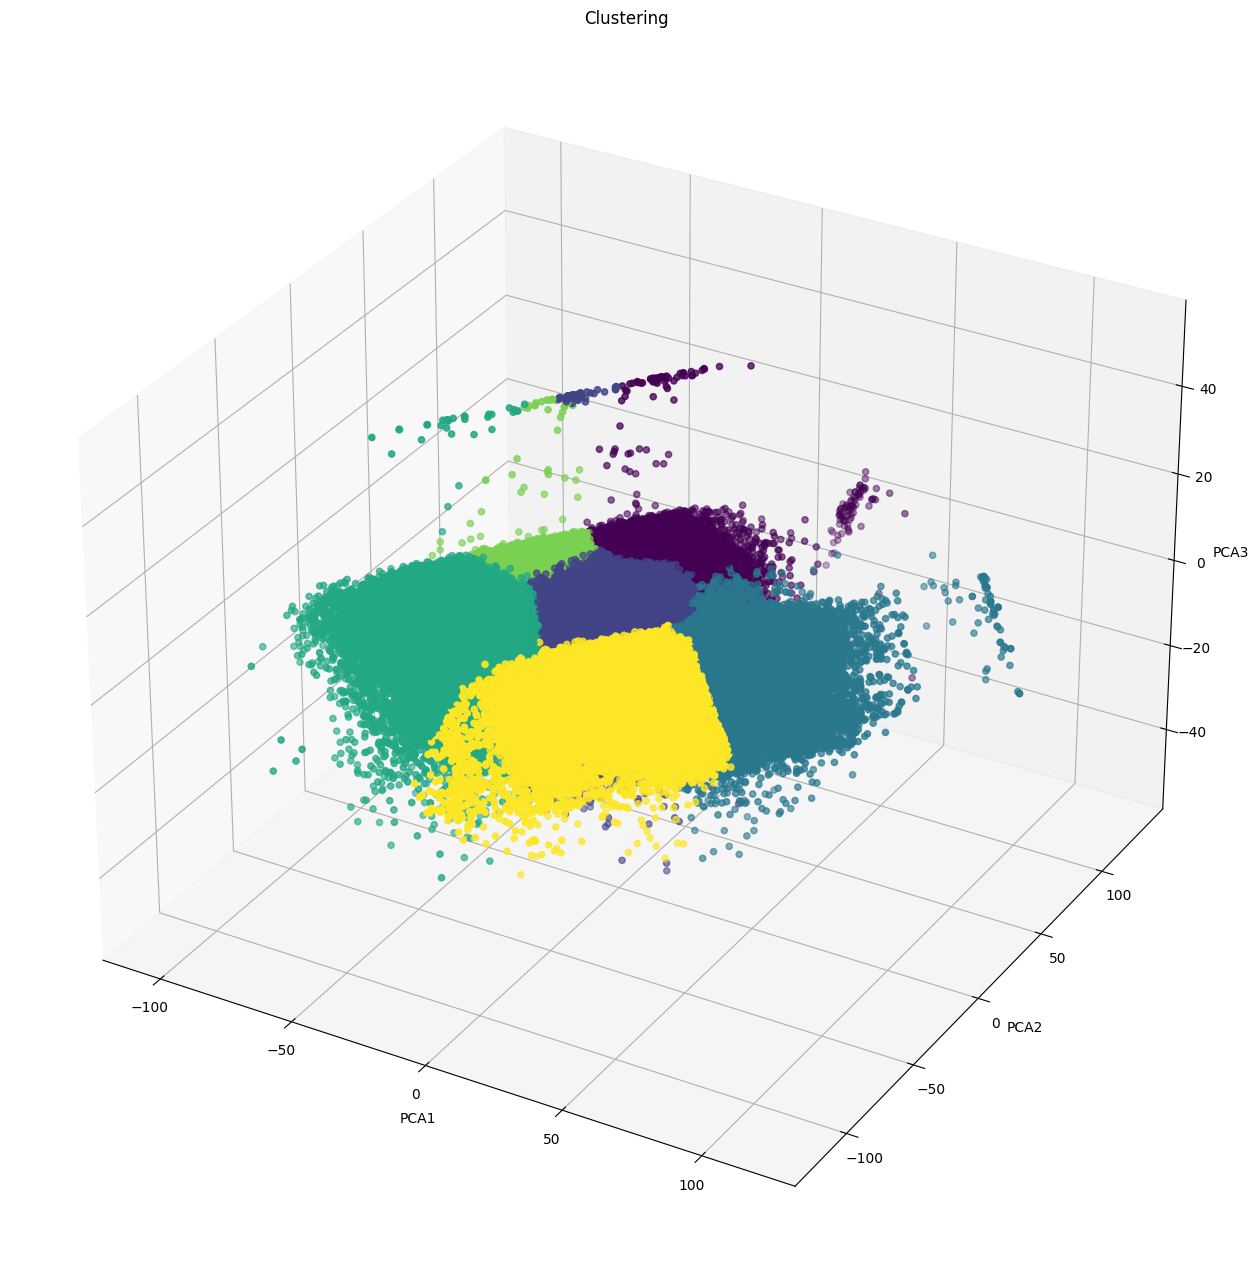

In [37]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection="3d")
ax.set_title("Clustering")
ax.scatter(pca_model[:, 0], pca_model[:, 1], pca_model[:, 2], c=labels)
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
plt.show()

## Analysis